In [1]:
!pip install deepface

     |████████████████████████████████| 61kB 3.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.3MB 9.1MB/s 
  Created wheel for gdown: filename=gdown-3.13.0-cp37-none-any.whl size=9046 sha256=17d0cc16fa0aa98fafd4ae6cf0af29914ffbe636b400faa362deae32fc71a389
  Stored in directory: /root/.cache/pip/wheels/ba/fa/c5/12813d7496f34652c43a471e11a780e769889d06e34735c32e
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#IMPORTS
from keras.utils.np_utils import to_categorical
# import keras
import pandas as pd
import numpy as np
import random
# import brewer2mpl
import sys
import warnings
from google.colab import files
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [4]:
import matplotlib.pyplot as plt
def plot_accuracy(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()

  plt.show()

In [5]:
batch_size = 32
img_height = 160
img_width = 160
train_dir = "/content/drive/MyDrive/AttracivenessSecond/Training" #passing the path with training images
test_dir = "/content/drive/MyDrive/AttracivenessSecond/Test"   #passing the path with testing images


In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  # validation_split=0.2,
  # subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

Found 1546 files belonging to 3 classes.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  # validation_split=0.2,
  # subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 130 files belonging to 3 classes.


In [8]:
class_names = train_ds.class_names
print(class_names)

['ModeratelyAttractive', 'NotAttractive', 'VeryAttractive']


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
import os
from pathlib import Path
import gdown
from functools import partial

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import add
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Input, concatenate
from tensorflow.keras.layers import Dense, Activation, Lambda, Flatten, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.models import load_model
tf_version = int(tf.__version__.split(".")[0])
from tensorflow.python.keras import backend
from tensorflow.python.keras.engine import training
from tensorflow.python.keras.utils import data_utils
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.lib.io import file_io
import tensorflow
import zipfile
from tensorflow.keras.layers import Convolution2D, LocallyConnected2D, Add, Dropout
from tensorflow.keras.layers import Concatenate


if tf_version == 1:
	from keras.models import Model, Sequential
	from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
else:
	from tensorflow import keras
	from tensorflow.keras.models import Model, Sequential
	from tensorflow.keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
	

In [11]:


def scaling(x, scale):
	return x * scale

def InceptionResNetV2():
	
	inputs = Input(shape=(160, 160, 3))
	x = Conv2D(32, 3, strides=2, padding='valid', use_bias=False, name= 'Conv2d_1a_3x3') (inputs)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_1a_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_1a_3x3_Activation')(x)
	x = Conv2D(32, 3, strides=1, padding='valid', use_bias=False, name= 'Conv2d_2a_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_2a_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_2a_3x3_Activation')(x)
	x = Conv2D(64, 3, strides=1, padding='same', use_bias=False, name= 'Conv2d_2b_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_2b_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_2b_3x3_Activation')(x)
	x = MaxPooling2D(3, strides=2, name='MaxPool_3a_3x3')(x)
	x = Conv2D(80, 1, strides=1, padding='valid', use_bias=False, name= 'Conv2d_3b_1x1') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_3b_1x1_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_3b_1x1_Activation')(x)
	x = Conv2D(192, 3, strides=1, padding='valid', use_bias=False, name= 'Conv2d_4a_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_4a_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_4a_3x3_Activation')(x)
	x = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Conv2d_4b_3x3') (x)
	x = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Conv2d_4b_3x3_BatchNorm')(x)
	x = Activation('relu', name='Conv2d_4b_3x3_Activation')(x)
	
	# 5x Block35 (Inception-ResNet-A block):
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_1_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_1_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_1_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_1_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_1_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_1_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_1_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_1_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_1_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_1_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_1_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_2_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_2_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_2_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_2_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_2_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_2_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_2_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_2_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_2_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_2_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_2_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_3_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_3_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_3_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_3_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_3_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_3_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_3_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_3_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_3_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_3_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_3_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_4_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_4_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_4_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_4_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_4_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_4_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_4_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_4_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_4_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_4_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_4_Activation')(x)
	
	branch_0 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block35_5_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_5_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block35_5_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_2 = Conv2D(32, 1, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_5_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_5_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(32, 3, strides=1, padding='same', use_bias=False, name= 'Block35_5_Branch_2_Conv2d_0c_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block35_5_Branch_2_Conv2d_0c_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Block35_5_Branch_2_Conv2d_0c_3x3_Activation')(branch_2)
	branches = [branch_0, branch_1, branch_2]
	mixed = Concatenate(axis=3, name='Block35_5_Concatenate')(branches)
	up = Conv2D(256, 1, strides=1, padding='same', use_bias=True, name= 'Block35_5_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.17})(up)
	x = add([x, up])
	x = Activation('relu', name='Block35_5_Activation')(x)

	# Mixed 6a (Reduction-A block):
	branch_0 = Conv2D(384, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_6a_Branch_0_Conv2d_1a_3x3') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_0_Conv2d_1a_3x3_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Mixed_6a_Branch_0_Conv2d_1a_3x3_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_6a_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_6a_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, 3, strides=1, padding='same', use_bias=False, name= 'Mixed_6a_Branch_1_Conv2d_0b_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_1_Conv2d_0b_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_6a_Branch_1_Conv2d_0b_3x3_Activation')(branch_1)
	branch_1 = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_6a_Branch_1_Conv2d_1a_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_6a_Branch_1_Conv2d_1a_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_6a_Branch_1_Conv2d_1a_3x3_Activation')(branch_1)
	branch_pool = MaxPooling2D(3, strides=2, padding='valid', name='Mixed_6a_Branch_2_MaxPool_1a_3x3')(x)
	branches = [branch_0, branch_1, branch_pool]
	x = Concatenate(axis=3, name='Mixed_6a')(branches)

	# 10x Block17 (Inception-ResNet-B block):
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_1_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_1_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_1_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_1_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_1_Branch_1_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_1_Branch_1_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_1_Branch_1_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_1_Branch_1_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_1_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_1_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_1_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_2_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_2_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_2_Branch_2_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_2_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_2_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_2_Branch_2_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_2_Branch_2_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_2_Branch_2_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_2_Branch_2_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_2_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_2_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_2_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_3_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_3_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_3_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_3_Branch_3_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_3_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_3_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_3_Branch_3_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_3_Branch_3_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_3_Branch_3_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_3_Branch_3_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_3_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_3_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_3_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_4_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_4_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_4_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_4_Branch_4_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_4_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_4_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_4_Branch_4_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_4_Branch_4_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_4_Branch_4_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_4_Branch_4_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_4_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_4_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_4_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_5_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_5_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_5_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_5_Branch_5_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_5_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_5_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_5_Branch_5_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_5_Branch_5_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_5_Branch_5_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_5_Branch_5_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_5_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_5_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_5_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_6_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_6_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_6_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_6_Branch_6_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_6_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_6_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_6_Branch_6_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_6_Branch_6_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_6_Branch_6_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_6_Branch_6_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_6_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_6_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_6_Activation')(x)	
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_7_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_7_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_7_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_7_Branch_7_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_7_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_7_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_7_Branch_7_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_7_Branch_7_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_7_Branch_7_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_7_Branch_7_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_7_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_7_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_7_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_8_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_8_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_8_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_8_Branch_8_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_8_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_8_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_8_Branch_8_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_8_Branch_8_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_8_Branch_8_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_8_Branch_8_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_8_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_8_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_8_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_9_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_9_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_9_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_9_Branch_9_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_9_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_9_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_9_Branch_9_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_9_Branch_9_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_9_Branch_9_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_9_Branch_9_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_9_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_9_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_9_Activation')(x)
	
	branch_0 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block17_10_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(128, 1, strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_10_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_10_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_10_Branch_10_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(128, [1, 7], strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_10_Conv2d_0b_1x7') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_10_Conv2d_0b_1x7_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_10_Branch_10_Conv2d_0b_1x7_Activation')(branch_1)
	branch_1 = Conv2D(128, [7, 1], strides=1, padding='same', use_bias=False, name= 'Block17_10_Branch_10_Conv2d_0c_7x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block17_10_Branch_10_Conv2d_0c_7x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block17_10_Branch_10_Conv2d_0c_7x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block17_10_Concatenate')(branches)
	up = Conv2D(896, 1, strides=1, padding='same', use_bias=True, name= 'Block17_10_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.1})(up)
	x = add([x, up])
	x = Activation('relu', name='Block17_10_Activation')(x)

	# Mixed 7a (Reduction-B block): 8 x 8 x 2080	
	branch_0 = Conv2D(256, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_0_Conv2d_0a_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_0_Conv2d_0a_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Mixed_7a_Branch_0_Conv2d_0a_1x1_Activation')(branch_0)
	branch_0 = Conv2D(384, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_7a_Branch_0_Conv2d_1a_3x3') (branch_0)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_0_Conv2d_1a_3x3_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Mixed_7a_Branch_0_Conv2d_1a_3x3_Activation')(branch_0)
	branch_1 = Conv2D(256, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_7a_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_7a_Branch_1_Conv2d_1a_3x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_1_Conv2d_1a_3x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Mixed_7a_Branch_1_Conv2d_1a_3x3_Activation')(branch_1)
	branch_2 = Conv2D(256, 1, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_2_Conv2d_0a_1x1') (x)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Mixed_7a_Branch_2_Conv2d_0a_1x1_Activation')(branch_2)
	branch_2 = Conv2D(256, 3, strides=1, padding='same', use_bias=False, name= 'Mixed_7a_Branch_2_Conv2d_0b_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_2_Conv2d_0b_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Mixed_7a_Branch_2_Conv2d_0b_3x3_Activation')(branch_2)
	branch_2 = Conv2D(256, 3, strides=2, padding='valid', use_bias=False, name= 'Mixed_7a_Branch_2_Conv2d_1a_3x3') (branch_2)
	branch_2 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Mixed_7a_Branch_2_Conv2d_1a_3x3_BatchNorm')(branch_2)
	branch_2 = Activation('relu', name='Mixed_7a_Branch_2_Conv2d_1a_3x3_Activation')(branch_2)
	branch_pool = MaxPooling2D(3, strides=2, padding='valid', name='Mixed_7a_Branch_3_MaxPool_1a_3x3')(x)
	branches = [branch_0, branch_1, branch_2, branch_pool]
	x = Concatenate(axis=3, name='Mixed_7a')(branches)

	# 5x Block8 (Inception-ResNet-C block):
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_1_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_1_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_1_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_1_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_1_Branch_1_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_1_Branch_1_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_1_Branch_1_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_1_Branch_1_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_1_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_1_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_1_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_2_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_2_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_2_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_2_Branch_2_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_2_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_2_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_2_Branch_2_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_2_Branch_2_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_2_Branch_2_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_2_Branch_2_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_2_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_2_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_2_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_3_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_3_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_3_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_3_Branch_3_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_3_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_3_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_3_Branch_3_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_3_Branch_3_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_3_Branch_3_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_3_Branch_3_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_3_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_3_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_3_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_4_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_4_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_4_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_4_Branch_4_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_4_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_4_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_4_Branch_4_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_4_Branch_4_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_4_Branch_4_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_4_Branch_4_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_4_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_4_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_4_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_5_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_5_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_5_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_5_Branch_5_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_5_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_5_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_5_Branch_5_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_5_Branch_5_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_5_Branch_5_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_5_Branch_5_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_5_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_5_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 0.2})(up)
	x = add([x, up])
	x = Activation('relu', name='Block8_5_Activation')(x)
	
	branch_0 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_0_Conv2d_1x1') (x)
	branch_0 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_0_Conv2d_1x1_BatchNorm')(branch_0)
	branch_0 = Activation('relu', name='Block8_6_Branch_0_Conv2d_1x1_Activation')(branch_0)
	branch_1 = Conv2D(192, 1, strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_1_Conv2d_0a_1x1') (x)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_1_Conv2d_0a_1x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_6_Branch_1_Conv2d_0a_1x1_Activation')(branch_1)
	branch_1 = Conv2D(192, [1, 3], strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_1_Conv2d_0b_1x3') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_1_Conv2d_0b_1x3_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_6_Branch_1_Conv2d_0b_1x3_Activation')(branch_1)
	branch_1 = Conv2D(192, [3, 1], strides=1, padding='same', use_bias=False, name= 'Block8_6_Branch_1_Conv2d_0c_3x1') (branch_1)
	branch_1 = BatchNormalization(axis=3, momentum=0.995, epsilon=0.001, scale=False, name='Block8_6_Branch_1_Conv2d_0c_3x1_BatchNorm')(branch_1)
	branch_1 = Activation('relu', name='Block8_6_Branch_1_Conv2d_0c_3x1_Activation')(branch_1)
	branches = [branch_0, branch_1]
	mixed = Concatenate(axis=3, name='Block8_6_Concatenate')(branches)
	up = Conv2D(1792, 1, strides=1, padding='same', use_bias=True, name= 'Block8_6_Conv2d_1x1') (mixed)
	up = Lambda(scaling, output_shape=K.int_shape(up)[1:], arguments={'scale': 1})(up)
	x = add([x, up])
	
	# Classification block
	x = GlobalAveragePooling2D(name='AvgPool')(x)
	x = Dropout(1.0 - 0.8, name='Dropout')(x)
	# Bottleneck
	x = Dense(128, use_bias=False, name='Bottleneck')(x)
	x = BatchNormalization(momentum=0.995, epsilon=0.001, scale=False, name='Bottleneck_BatchNorm')(x)

	# Create model
	model = Model(inputs, x, name='inception_resnet_v1')

	return model




#---------------------------------------

def vggbaseModel():
	model = Sequential()
	model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(64, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(128, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(256, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(ZeroPadding2D((1,1)))
	model.add(Convolution2D(512, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2,2), strides=(2,2)))

	model.add(Convolution2D(4096, (7, 7), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(4096, (1, 1), activation='relu'))
	model.add(Dropout(0.5))
	model.add(Convolution2D(2622, (1, 1)))
	model.add(Flatten())
	model.add(Activation('softmax'))
	
	return model



#---------------------------------------

def openFaceModel():
  myInput = Input(shape=(96, 96, 3))

  x = ZeroPadding2D(padding=(3, 3), input_shape=(96, 96, 3))(myInput)
  x = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
  x = BatchNormalization(axis=3, epsilon=0.00001, name='bn1')(x)
  x = Activation('relu')(x)
  x = ZeroPadding2D(padding=(1, 1))(x)
  x = MaxPooling2D(pool_size=3, strides=2)(x)
  x = Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75), name='lrn_1')(x)
  x = Conv2D(64, (1, 1), name='conv2')(x)
  x = BatchNormalization(axis=3, epsilon=0.00001, name='bn2')(x)
  x = Activation('relu')(x)
  x = ZeroPadding2D(padding=(1, 1))(x)
  x = Conv2D(192, (3, 3), name='conv3')(x)
  x = BatchNormalization(axis=3, epsilon=0.00001, name='bn3')(x)
  x = Activation('relu')(x)
  x = Lambda(lambda x: tf.nn.lrn(x, alpha=1e-4, beta=0.75), name='lrn_2')(x) #x is equal added
  x = ZeroPadding2D(padding=(1, 1))(x)
  x = MaxPooling2D(pool_size=3, strides=2)(x)

  # Inception3a
  inception_3a_3x3 = Conv2D(96, (1, 1), name='inception_3a_3x3_conv1')(x)
  inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn1')(inception_3a_3x3)
  inception_3a_3x3 = Activation('relu')(inception_3a_3x3)
  inception_3a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3a_3x3)
  inception_3a_3x3 = Conv2D(128, (3, 3), name='inception_3a_3x3_conv2')(inception_3a_3x3)
  inception_3a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_3x3_bn2')(inception_3a_3x3)
  inception_3a_3x3 = Activation('relu')(inception_3a_3x3)

  inception_3a_5x5 = Conv2D(16, (1, 1), name='inception_3a_5x5_conv1')(x)
  inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn1')(inception_3a_5x5)
  inception_3a_5x5 = Activation('relu')(inception_3a_5x5)
  inception_3a_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3a_5x5)
  inception_3a_5x5 = Conv2D(32, (5, 5), name='inception_3a_5x5_conv2')(inception_3a_5x5)
  inception_3a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_5x5_bn2')(inception_3a_5x5)
  inception_3a_5x5 = Activation('relu')(inception_3a_5x5)

  inception_3a_pool = MaxPooling2D(pool_size=3, strides=2)(x)
  inception_3a_pool = Conv2D(32, (1, 1), name='inception_3a_pool_conv')(inception_3a_pool)
  inception_3a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_pool_bn')(inception_3a_pool)
  inception_3a_pool = Activation('relu')(inception_3a_pool)
  inception_3a_pool = ZeroPadding2D(padding=((3, 4), (3, 4)))(inception_3a_pool)

  inception_3a_1x1 = Conv2D(64, (1, 1), name='inception_3a_1x1_conv')(x)
  inception_3a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3a_1x1_bn')(inception_3a_1x1)
  inception_3a_1x1 = Activation('relu')(inception_3a_1x1)

  inception_3a = concatenate([inception_3a_3x3, inception_3a_5x5, inception_3a_pool, inception_3a_1x1], axis=3)

  # Inception3b
  inception_3b_3x3 = Conv2D(96, (1, 1), name='inception_3b_3x3_conv1')(inception_3a)
  inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn1')(inception_3b_3x3)
  inception_3b_3x3 = Activation('relu')(inception_3b_3x3)
  inception_3b_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3b_3x3)
  inception_3b_3x3 = Conv2D(128, (3, 3), name='inception_3b_3x3_conv2')(inception_3b_3x3)
  inception_3b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_3x3_bn2')(inception_3b_3x3)
  inception_3b_3x3 = Activation('relu')(inception_3b_3x3)

  inception_3b_5x5 = Conv2D(32, (1, 1), name='inception_3b_5x5_conv1')(inception_3a)
  inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn1')(inception_3b_5x5)
  inception_3b_5x5 = Activation('relu')(inception_3b_5x5)
  inception_3b_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3b_5x5)
  inception_3b_5x5 = Conv2D(64, (5, 5), name='inception_3b_5x5_conv2')(inception_3b_5x5)
  inception_3b_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_5x5_bn2')(inception_3b_5x5)
  inception_3b_5x5 = Activation('relu')(inception_3b_5x5)

  inception_3b_pool = Lambda(lambda x: x**2, name='power2_3b')(inception_3a)
  inception_3b_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_3b_pool)
  inception_3b_pool = Lambda(lambda x: x*9, name='mult9_3b')(inception_3b_pool)
  inception_3b_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_3b')(inception_3b_pool)
  inception_3b_pool = Conv2D(64, (1, 1), name='inception_3b_pool_conv')(inception_3b_pool)
  inception_3b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_pool_bn')(inception_3b_pool)
  inception_3b_pool = Activation('relu')(inception_3b_pool)
  inception_3b_pool = ZeroPadding2D(padding=(4, 4))(inception_3b_pool)

  inception_3b_1x1 = Conv2D(64, (1, 1), name='inception_3b_1x1_conv')(inception_3a)
  inception_3b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3b_1x1_bn')(inception_3b_1x1)
  inception_3b_1x1 = Activation('relu')(inception_3b_1x1)

  inception_3b = concatenate([inception_3b_3x3, inception_3b_5x5, inception_3b_pool, inception_3b_1x1], axis=3)

  # Inception3c
  inception_3c_3x3 = Conv2D(128, (1, 1), strides=(1, 1), name='inception_3c_3x3_conv1')(inception_3b)
  inception_3c_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_3x3_bn1')(inception_3c_3x3)
  inception_3c_3x3 = Activation('relu')(inception_3c_3x3)
  inception_3c_3x3 = ZeroPadding2D(padding=(1, 1))(inception_3c_3x3)
  inception_3c_3x3 = Conv2D(256, (3, 3), strides=(2, 2), name='inception_3c_3x3_conv'+'2')(inception_3c_3x3)
  inception_3c_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_3x3_bn'+'2')(inception_3c_3x3)
  inception_3c_3x3 = Activation('relu')(inception_3c_3x3)

  inception_3c_5x5 = Conv2D(32, (1, 1), strides=(1, 1), name='inception_3c_5x5_conv1')(inception_3b)
  inception_3c_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_5x5_bn1')(inception_3c_5x5)
  inception_3c_5x5 = Activation('relu')(inception_3c_5x5)
  inception_3c_5x5 = ZeroPadding2D(padding=(2, 2))(inception_3c_5x5)
  inception_3c_5x5 = Conv2D(64, (5, 5), strides=(2, 2), name='inception_3c_5x5_conv'+'2')(inception_3c_5x5)
  inception_3c_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_3c_5x5_bn'+'2')(inception_3c_5x5)
  inception_3c_5x5 = Activation('relu')(inception_3c_5x5)

  inception_3c_pool = MaxPooling2D(pool_size=3, strides=2)(inception_3b)
  inception_3c_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_3c_pool)

  inception_3c = concatenate([inception_3c_3x3, inception_3c_5x5, inception_3c_pool], axis=3)

  #inception 4a
  inception_4a_3x3 = Conv2D(96, (1, 1), strides=(1, 1), name='inception_4a_3x3_conv'+'1')(inception_3c)
  inception_4a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_3x3_bn'+'1')(inception_4a_3x3)
  inception_4a_3x3 = Activation('relu')(inception_4a_3x3)
  inception_4a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_4a_3x3)
  inception_4a_3x3 = Conv2D(192, (3, 3), strides=(1, 1), name='inception_4a_3x3_conv'+'2')(inception_4a_3x3)
  inception_4a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_3x3_bn'+'2')(inception_4a_3x3)
  inception_4a_3x3 = Activation('relu')(inception_4a_3x3)

  inception_4a_5x5 = Conv2D(32, (1,1), strides=(1,1), name='inception_4a_5x5_conv1')(inception_3c)
  inception_4a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_5x5_bn1')(inception_4a_5x5)
  inception_4a_5x5 = Activation('relu')(inception_4a_5x5)
  inception_4a_5x5 = ZeroPadding2D(padding=(2,2))(inception_4a_5x5)
  inception_4a_5x5 = Conv2D(64, (5,5), strides=(1,1), name='inception_4a_5x5_conv'+'2')(inception_4a_5x5)
  inception_4a_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_5x5_bn'+'2')(inception_4a_5x5)
  inception_4a_5x5 = Activation('relu')(inception_4a_5x5)

  inception_4a_pool = Lambda(lambda x: x**2, name='power2_4a')(inception_3c)
  inception_4a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_4a_pool)
  inception_4a_pool = Lambda(lambda x: x*9, name='mult9_4a')(inception_4a_pool)
  inception_4a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_4a')(inception_4a_pool)

  inception_4a_pool = Conv2D(128, (1,1), strides=(1,1), name='inception_4a_pool_conv'+'')(inception_4a_pool)
  inception_4a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_pool_bn'+'')(inception_4a_pool)
  inception_4a_pool = Activation('relu')(inception_4a_pool)
  inception_4a_pool = ZeroPadding2D(padding=(2, 2))(inception_4a_pool)

  inception_4a_1x1 = Conv2D(256, (1, 1), strides=(1, 1), name='inception_4a_1x1_conv'+'')(inception_3c)
  inception_4a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4a_1x1_bn'+'')(inception_4a_1x1)
  inception_4a_1x1 = Activation('relu')(inception_4a_1x1)

  inception_4a = concatenate([inception_4a_3x3, inception_4a_5x5, inception_4a_pool, inception_4a_1x1], axis=3)

  #inception4e
  inception_4e_3x3 = Conv2D(160, (1,1), strides=(1,1), name='inception_4e_3x3_conv'+'1')(inception_4a)
  inception_4e_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_3x3_bn'+'1')(inception_4e_3x3)
  inception_4e_3x3 = Activation('relu')(inception_4e_3x3)
  inception_4e_3x3 = ZeroPadding2D(padding=(1, 1))(inception_4e_3x3)
  inception_4e_3x3 = Conv2D(256, (3,3), strides=(2,2), name='inception_4e_3x3_conv'+'2')(inception_4e_3x3)
  inception_4e_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_3x3_bn'+'2')(inception_4e_3x3)
  inception_4e_3x3 = Activation('relu')(inception_4e_3x3)

  inception_4e_5x5 = Conv2D(64, (1,1), strides=(1,1), name='inception_4e_5x5_conv'+'1')(inception_4a)
  inception_4e_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_5x5_bn'+'1')(inception_4e_5x5)
  inception_4e_5x5 = Activation('relu')(inception_4e_5x5)
  inception_4e_5x5 = ZeroPadding2D(padding=(2, 2))(inception_4e_5x5)
  inception_4e_5x5 = Conv2D(128, (5,5), strides=(2,2), name='inception_4e_5x5_conv'+'2')(inception_4e_5x5)
  inception_4e_5x5 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_4e_5x5_bn'+'2')(inception_4e_5x5)
  inception_4e_5x5 = Activation('relu')(inception_4e_5x5)

  inception_4e_pool = MaxPooling2D(pool_size=3, strides=2)(inception_4a)
  inception_4e_pool = ZeroPadding2D(padding=((0, 1), (0, 1)))(inception_4e_pool)

  inception_4e = concatenate([inception_4e_3x3, inception_4e_5x5, inception_4e_pool], axis=3)

  #inception5a
  inception_5a_3x3 = Conv2D(96, (1,1), strides=(1,1), name='inception_5a_3x3_conv'+'1')(inception_4e)
  inception_5a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_3x3_bn'+'1')(inception_5a_3x3)
  inception_5a_3x3 = Activation('relu')(inception_5a_3x3)
  inception_5a_3x3 = ZeroPadding2D(padding=(1, 1))(inception_5a_3x3)
  inception_5a_3x3 = Conv2D(384, (3,3), strides=(1,1), name='inception_5a_3x3_conv'+'2')(inception_5a_3x3)
  inception_5a_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_3x3_bn'+'2')(inception_5a_3x3)
  inception_5a_3x3 = Activation('relu')(inception_5a_3x3)

  inception_5a_pool = Lambda(lambda x: x**2, name='power2_5a')(inception_4e)
  inception_5a_pool = AveragePooling2D(pool_size=(3, 3), strides=(3, 3))(inception_5a_pool)
  inception_5a_pool = Lambda(lambda x: x*9, name='mult9_5a')(inception_5a_pool)
  inception_5a_pool = Lambda(lambda x: K.sqrt(x), name='sqrt_5a')(inception_5a_pool)

  inception_5a_pool = Conv2D(96, (1,1), strides=(1,1), name='inception_5a_pool_conv'+'')(inception_5a_pool)
  inception_5a_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_pool_bn'+'')(inception_5a_pool)
  inception_5a_pool = Activation('relu')(inception_5a_pool)
  inception_5a_pool = ZeroPadding2D(padding=(1,1))(inception_5a_pool)

  inception_5a_1x1 = Conv2D(256, (1,1), strides=(1,1), name='inception_5a_1x1_conv'+'')(inception_4e)
  inception_5a_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5a_1x1_bn'+'')(inception_5a_1x1)
  inception_5a_1x1 = Activation('relu')(inception_5a_1x1)

  inception_5a = concatenate([inception_5a_3x3, inception_5a_pool, inception_5a_1x1], axis=3)

  #inception_5b
  inception_5b_3x3 = Conv2D(96, (1,1), strides=(1,1), name='inception_5b_3x3_conv'+'1')(inception_5a)
  inception_5b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_3x3_bn'+'1')(inception_5b_3x3)
  inception_5b_3x3 = Activation('relu')(inception_5b_3x3)
  inception_5b_3x3 = ZeroPadding2D(padding=(1,1))(inception_5b_3x3)
  inception_5b_3x3 = Conv2D(384, (3,3), strides=(1,1), name='inception_5b_3x3_conv'+'2')(inception_5b_3x3)
  inception_5b_3x3 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_3x3_bn'+'2')(inception_5b_3x3)
  inception_5b_3x3 = Activation('relu')(inception_5b_3x3)

  inception_5b_pool = MaxPooling2D(pool_size=3, strides=2)(inception_5a)

  inception_5b_pool = Conv2D(96, (1,1), strides=(1,1), name='inception_5b_pool_conv'+'')(inception_5b_pool)
  inception_5b_pool = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_pool_bn'+'')(inception_5b_pool)
  inception_5b_pool = Activation('relu')(inception_5b_pool)

  inception_5b_pool = ZeroPadding2D(padding=(1, 1))(inception_5b_pool)

  inception_5b_1x1 = Conv2D(256, (1,1), strides=(1,1), name='inception_5b_1x1_conv'+'')(inception_5a)
  inception_5b_1x1 = BatchNormalization(axis=3, epsilon=0.00001, name='inception_5b_1x1_bn'+'')(inception_5b_1x1)
  inception_5b_1x1 = Activation('relu')(inception_5b_1x1)

  inception_5b = concatenate([inception_5b_3x3, inception_5b_pool, inception_5b_1x1], axis=3)

  av_pool = AveragePooling2D(pool_size=(3, 3), strides=(1, 1))(inception_5b)
  reshape_layer = Flatten()(av_pool)
  dense_layer = Dense(128, name='dense_layer')(reshape_layer)
  norm_layer = Lambda(lambda  x: K.l2_normalize(x, axis=1), name='norm_layer')(dense_layer)

  # Final Model
  model = Model(inputs=[myInput], outputs=norm_layer)
  return model


def deepFaceModel():
  base_model = Sequential()
  base_model.add(Convolution2D(32, (11, 11), activation='relu', name='C1', input_shape=(152, 152, 3)))
  base_model.add(MaxPooling2D(pool_size=3, strides=2, padding='same', name='M2'))
  base_model.add(Convolution2D(16, (9, 9), activation='relu', name='C3'))
  base_model.add(LocallyConnected2D(16, (9, 9), activation='relu', name='L4'))
  base_model.add(LocallyConnected2D(16, (7, 7), strides=2, activation='relu', name='L5') )
  base_model.add(LocallyConnected2D(16, (5, 5), activation='relu', name='L6'))
  base_model.add(Flatten(name='F0'))
  base_model.add(Dense(4096, activation='relu', name='F7'))
  base_model.add(Dropout(rate=0.5, name='D0'))
  base_model.add(Dense(8631, activation='softmax', name='F8'))
  return base_model
	
	#---------------------------------
def deepIDModel():
  myInput = Input(shape=(55, 47, 3))

  x = Conv2D(20, (4, 4), name='Conv1', activation='relu', input_shape=(55, 47, 3))(myInput)
  x = MaxPooling2D(pool_size=2, strides=2, name='Pool1')(x)
  x = Dropout(rate=0.99, name='D1')(x)

  x = Conv2D(40, (3, 3), name='Conv2', activation='relu')(x)
  x = MaxPooling2D(pool_size=2, strides=2, name='Pool2')(x)
  x = Dropout(rate=0.99, name='D2')(x)

  x = Conv2D(60, (3, 3), name='Conv3', activation='relu')(x)
  x = MaxPooling2D(pool_size=2, strides=2, name='Pool3')(x)
  x = Dropout(rate=0.99, name='D3')(x)

  x1 = Flatten()(x)
  fc11 = Dense(160, name = 'fc11')(x1)

  x2 = Conv2D(80, (2, 2), name='Conv4', activation='relu')(x)
  x2 = Flatten()(x2)
  fc12 = Dense(160, name = 'fc12')(x2)

  y = Add()([fc11, fc12])
  y = Activation('relu', name = 'deepid')(y)

  model = Model(inputs=[myInput], outputs=y)
  return model

	
def ResNet34():

  img_input = tensorflow.keras.layers.Input(shape=(112, 112, 3))

  x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name='conv1_pad')(img_input)
  x = tensorflow.keras.layers.Conv2D(64, 3, strides=1, use_bias=False, kernel_initializer='glorot_normal', name='conv1_conv')(x)
  x = tensorflow.keras.layers.BatchNormalization(axis=3, epsilon=2e-5, momentum=0.9, name='conv1_bn')(x)
  x = tensorflow.keras.layers.PReLU(shared_axes=[1, 2], name='conv1_prelu')(x)
  x = stack_fn(x)

  model = training.Model(img_input, x, name='ResNet34')

  return model



def block1(x, filters, kernel_size=3, stride=1, conv_shortcut=True, name=None):
  bn_axis = 3

  if conv_shortcut:
    shortcut = tensorflow.keras.layers.Conv2D(filters, 1, strides=stride, use_bias=False, kernel_initializer='glorot_normal', name=name + '_0_conv')(x)
    shortcut = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_0_bn')(shortcut)
  else:
    shortcut = x

  x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_1_bn')(x)
  x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name=name + '_1_pad')(x)
  x = tensorflow.keras.layers.Conv2D(filters, 3, strides=1, kernel_initializer='glorot_normal', use_bias=False, name=name + '_1_conv')(x)
  x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_2_bn')(x)
  x = tensorflow.keras.layers.PReLU(shared_axes=[1, 2], name=name + '_1_prelu')(x)

  x = tensorflow.keras.layers.ZeroPadding2D(padding=1, name=name + '_2_pad')(x)
  x = tensorflow.keras.layers.Conv2D(filters, kernel_size, strides=stride, kernel_initializer='glorot_normal', use_bias=False, name=name + '_2_conv')(x)
  x = tensorflow.keras.layers.BatchNormalization(axis=bn_axis, epsilon=2e-5, momentum=0.9, name=name + '_3_bn')(x)

  x = tensorflow.keras.layers.Add(name=name + '_add')([shortcut, x])
  return x

def stack1(x, filters, blocks, stride1=2, name=None):
  x = block1(x, filters, stride=stride1, name=name + '_block1')
  for i in range(2, blocks + 1):
    x = block1(x, filters, conv_shortcut=False, name=name + '_block' + str(i))
  return x

def stack_fn(x):
  x = stack1(x, 64, 3, name='conv2')
  x = stack1(x, 128, 4, name='conv3')
  x = stack1(x, 256, 6, name='conv4')
  return stack1(x, 512, 3, name='conv5')

def arcFaceModel():
  base_model = ResNet34()
  inputs = base_model.inputs[0]
  arcface_model = base_model.outputs[0]
  arcface_model = keras.layers.BatchNormalization(momentum=0.9, epsilon=2e-5)(arcface_model)
  arcface_model = keras.layers.Dropout(0.4)(arcface_model)
  arcface_model = keras.layers.Flatten()(arcface_model)
  arcface_model = keras.layers.Dense(512, activation=None, use_bias=True, kernel_initializer="glorot_normal")(arcface_model)
  embedding = keras.layers.BatchNormalization(momentum=0.9, epsilon=2e-5, name="embedding", scale=True)(arcface_model)
  model = keras.models.Model(inputs, embedding, name=base_model.name)
  return model





In [12]:

def loadAModel(basemodel,nameOfWheights):
  home = "/content/drive/MyDrive/Models_Herodotou/"
  model = basemodel
  output = home+nameOfWheights
  model.load_weights(output)
  return model


def loadFaceNetModel():
  return loadAModel(basemodel=InceptionResNetV2(),nameOfWheights='facenet_weights.h5')

def loadVGGFaceModel():
  model = loadAModel(basemodel=vggbaseModel(),nameOfWheights='vgg_face_weights.h5')
  return  Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

def loadOpenFaceModel():
  return loadAModel(basemodel=openFaceModel(),nameOfWheights='openface_weights.h5')

def loadDeepFaceModel():
  base_model=  loadAModel(basemodel=deepFaceModel(),nameOfWheights='VGGFace2_DeepFace_weights_val-0.9034.h5')
  return Model(inputs=base_model.layers[0].input, outputs=base_model.layers[-3].output)

def loadDeepIDModel():
  return loadAModel(basemodel=deepIDModel(),nameOfWheights='deepid_keras_weights.h5')

def loadArcFaceModel():
  return loadAModel(basemodel=arcFaceModel(),nameOfWheights='arcface_weights.h5')

In [13]:
facenet= loadFaceNetModel()
vggface= loadVGGFaceModel()
openface=loadOpenFaceModel()
deepface=loadDeepFaceModel()
# deepID=loadDeepIDModel()
# arcFace=loadArcFaceModel()

In [14]:
# face_recognition_models=[facenet,vggface,openface, deepface,deepID,arcFace]
face_recognition_models=[facenet,vggface,openface, deepface]


In [15]:
import time
from os import path
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle

from deepface.basemodels import VGGFace, OpenFace, Facenet, FbDeepFace, DeepID, DlibWrapper, ArcFace, Boosting
from deepface.commons import functions, realtime, distance as dst
from keras.preprocessing import image as image_keras_preprocessing

#################

def postProcesssing(img, grayscale=False,target_size=(160,160)):
  #post-processing
  if grayscale == True:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  img = cv2.resize(img, target_size)
  #TODO: resize causes transformation on base image, you should add black pixels to rezie it to target_size

  img_pixels = image_keras_preprocessing.img_to_array(img)
  img_pixels = np.expand_dims(img_pixels, axis = 0)
  img_pixels /= 255 #normalize input in [0, 1]
  return img_pixels

def myRepresent(images,model_list , listWithFaceDetectors=["ssd", "opencv","mtcnn","dlib", "retinaface"], grayscale=False, enforce_detection = True, align = True):
  """
  This function represents facial images as vectors.
  Parameters:
    img_path: exact image path, numpy array or based64 encoded images could be passed.
    model_name (string): VGG-Face, Facenet, OpenFace, DeepFace, DeepID, Dlib, ArcFace.
    model: Built deepface model. A face recognition model is built every call of verify function. You can pass pre-built face recognition model optionally if you will call verify function several times. Consider to pass model if you are going to call represent function in a for loop.
      model = DeepFace.build_model('VGG-Face')
    enforce_detection (boolean): If any face could not be detected in an image, then verify function will return exception. Set this to False not to have this exception. This might be convenient for low resolution images.
    detector_backend (string): set face detector backend as retinaface, mtcnn, opencv, ssd or dlib
  Returns:
    Represent function returns a multidimensional vector. The number of dimensions is changing based on the reference model. E.g. FaceNet returns 128 dimensional vector; VGG-Face returns 2622 dimensional vector.
  """

  #detect face in all images
  FRimages=list()
  for image in images: 
    managed_to_find_face=False
    for detector_backend in listWithFaceDetectors:
      try:
          img, region = functions.detect_face(img = image, detector_backend = detector_backend, grayscale = grayscale, enforce_detection = enforce_detection, align = align)
          #--------------------------
          if img.shape[0] == 0 or img.shape[1] == 0:
            if enforce_detection == True:
              raise ValueError("Detected face shape is ", img.shape,". Consider to set enforce_detection argument to False.")
            else: #restore base image
              img = base_img.copy()
          #--------------------------

        #   img = functions.preprocess_face(img = image
        # , target_size=(input_shape_y, input_shape_x)
        # , enforce_detection = enforce_detection
        # , detector_backend = detector_backend
        # , align = align)
          managed_to_find_face=True
          FRimages.append(img)
          break;
      except ValueError: 
        continue
    if(managed_to_find_face==False):
      print("I COUNT NOT FIND THE FACE!!!!!")
      plt.imshow(image)


  sizeOfFinalinput=0;
  tempImage=FRimages[0]
  for model in model_list:
    input_shape =  input_shape_x, input_shape_y= functions.find_input_shape(model)
    img= postProcesssing(tempImage, grayscale=False,target_size=(input_shape_y, input_shape_x))
    curentEmbedings = model.predict(img)[0].tolist()
    sizeOfFinalinput= sizeOfFinalinput+ len(curentEmbedings)
  print("sizeOfFinalinput "+str(sizeOfFinalinput) )

  inputSize=(images.shape[0], sizeOfFinalinput)
  embedings=np.empty(inputSize)
  for index, image in enumerate(FRimages):
    image_embedgins= list()
    for model in model_list:
      try:
        input_shape =  input_shape_x, input_shape_y= functions.find_input_shape(model)
        img= postProcesssing(image, grayscale=False,target_size=(input_shape_y, input_shape_x))
        curentEmbedings = model.predict(img)[0].tolist()
        image_embedgins.extend(curentEmbedings)
      except:
        print("i couldnt get embedings")
        plt.imshow(image)
    npEmbedings=np.asarray(image_embedgins)
    embedings[index]=npEmbedings

  return embedings


Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [16]:
x_train=[]
y_train=[]
for images, labels in train_ds:
  for image in images:
    x_train.append(np.asarray(image).astype("uint8"))
  for label in labels:
    y_train.append(label)
x_train=np.asarray(x_train)
y_train=np.asarray(y_train).reshape(len(y_train),1)

print(x_train.shape)
print(y_train.shape)

(1546, 160, 160, 3)
(1546, 1)


In [17]:
x_test=[]
y_test=[]
for images, labels in val_ds:
  for image in images:
    x_test.append(np.asarray(image).astype("uint8"))
  for label in labels:
    y_test.append(label)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test).reshape(len(y_test),1)

print(x_test.shape)
print(y_test.shape)

(130, 160, 160, 3)
(130, 1)


In [18]:
# sizeOfFinalinput=0;
# tempImage=x_train[0]
# for model in face_recognition_models:
#   temp= DeepFace.represent(img_path=tempImage, model = model, enforce_detection = True, detector_backend = 'ssd', align = True)
#   sizeOfFinalinput=sizeOfFinalinput+len(temp)
# sizeOfFinalinput

In [19]:
# tempList= [x_train[0], x_train[1], x_train[2], x_train[3]]
# tempList=np.asarray(tempList)
# tempList.shape

In [ ]:
x_train_embedings= myRepresent(x_train,model_list=face_recognition_models ,
            listWithFaceDetectors=["ssd"], enforce_detection = True, align = True)

In [20]:

x_test_embedings=myRepresent(x_test,model_list=face_recognition_models ,
            listWithFaceDetectors=["ssd"], enforce_detection = True, align = True)


deploy.prototxt will be downloaded...


Downloading...
From: https://github.com/opencv/opencv/raw/3.4.0/samples/dnn/face_detector/deploy.prototxt
To: /root/.deepface/weights/deploy.prototxt
28.1kB [00:00, 17.5MB/s]                   


res10_300x300_ssd_iter_140000.caffemodel will be downloaded...


Downloading...
From: https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
To: /root/.deepface/weights/res10_300x300_ssd_iter_140000.caffemodel
100%|██████████| 10.7M/10.7M [00:00<00:00, 21.3MB/s]


sizeOfFinalinput 6974


In [ ]:
x_test_embedings[0]

array([-0.95929134, -0.53303826, -1.18926179, ...,  0.        ,
        7.40330601,  1.40301573])

In [ ]:
[0.7387087345123291,0.4066475033760071,0.6455330848693848,0.24723491072654724,-0.3161671757698059,0.7416903376579285,-0.6737117171287537,-0.641787052154541,-0.24635672569274902,0.01280779018998146,-0.5381258130073547,0.060596905648708344,-0.36612725257873535,0.6634042263031006,0.9665151834487915,0.414821982383728,0.023740239441394806,-0.5310307145118713,-1.8969485759735107,-0.4097670018672943,-1.1299587488174438,0.5551950931549072,0.6795551776885986,0.004951506853103638,0.15655401349067688,0.8471044301986694,0.7189465761184692,0.45399367809295654,0.08436174690723419,-0.5166872143745422,0.48939433693885803,0.28836652636528015,1.7546828985214233,-0.08162101358175278,0.502459704875946,2.0312304496765137,-1.1080857515335083,-0.6888745427131653,0.7301467657089233,0.19816158711910248,-0.4027706980705261,0.6738681197166443,-0.6031781435012817,-1.7635964155197144,2.116114377975464,1.6293001174926758,-0.27382075786590576,-0.13689488172531128,0.34399449825286865,-1.7154024839401245,1.9574881792068481,-1.7365282773971558,1.4630534648895264,-1.4067304134368896,0.9096490740776062,-0.15789635479450226,1.1346640586853027,-0.45333296060562134,1.3718113899230957,-1.1290922164916992,0.3767467439174652,1.0947139263153076,-1.5714589357376099,0.7431251406669617,1.4708253145217896,-0.6553871631622314,1.6297847032546997,0.017860710620880127,1.1214662790298462,1.0742247104644775,-0.12963435053825378,0.7142988443374634,-1.7913274765014648,-1.023536205291748,0.89774090051651,0.369129478931427,-0.4655935764312744,0.17838233709335327,0.8259176015853882,0.1657261699438095,0.4060393273830414,0.2211810052394867,0.4747109115123749,0.17973797023296356,0.2186107337474823,-0.22045588493347168,0.5957091450691223,0.5528157949447632,-0.9194662570953369,-1.4463988542556763,0.4645593464374542,1.7004480361938477,-0.14937372505664825,0.40248510241508484,0.6100928783416748,-0.24708165228366852,0.4030165374279022,0.02530761808156967,-0.29284846782684326,1.510146141052246,-0.7401293516159058,-0.8660908341407776,-2.953993797302246,-0.054714709520339966,-0.9916112422943115,0.7903200387954712,-1.6484476327896118,-0.2036518156528473,-0.2570394277572632,1.4599239826202393,-1.7852635383605957,1.374497652053833,-1.7317721843719482,-0.4865766167640686,0.3381923735141754,2.5519070625305176,-1.1293383836746216,-0.40813589096069336,0.1769060492515564,-0.5398523211479187,0.7730006575584412,-0.8145705461502075,1.252012014389038,-1.1190181970596313,2.6685409545898438,-2.5101966857910156,1.0983542203903198,-0.31164470314979553,0.010733411647379398,0.010252514854073524,0.001435528160072863,0.006781721953302622,-0.010739647783339024,0.007991937920451164,0.0071333288215100765,0.0035391731653362513,0.004105730447918177,0.010158857330679893,0.010072320699691772,-0.004139058757573366,0.01222511101514101,0.001947931945323944,0.014359884895384312,0.0005909062456339598,0.010542517527937889,0.01580580323934555,0.008876264095306396,0.0022452014964073896,0.001915894215926528,0.014910204336047173,0.011147319339215755,0.009735703468322754,0.013454646803438663,-0.0006785602308809757,0.008368909358978271,0.011743415147066116,-0.005886911414563656,-0.0013000525068491697,0.025461353361606598,0.004010588862001896,-0.0012242387747392058,0.010059429332613945,0.012982580810785294,0.006789364852011204,0.004295111168175936,0.014878460206091404,-0.0008549350313842297,0.013554594479501247,0.0130788404494524,-0.0059625268913805485,0.0038946284912526608,-0.007778741419315338,-0.004962661769241095,-0.005947033409029245,-0.0010946991387754679,-0.01134774275124073,0.008513938635587692,-0.009508466348052025,-0.009428069926798344,0.0157085582613945,-0.00853097066283226,0.02377205714583397,-0.0004902006476186216,0.001320844516158104,-0.012677903287112713,0.027325309813022614,-0.005225005559623241,-0.008147159591317177,-2.1764542907476425e-05,0.006256686057895422,0.007118758745491505,0.00801039021462202,0.0020592447835952044,0.01249780785292387,-0.00570646533742547,0.001411102362908423,-0.011250823736190796,0.007193147204816341,-0.00031096715247258544,0.010392880998551846,-0.004617962520569563,0.005769340321421623,-0.0003564465732779354,-0.008312338031828403,0.010551377199590206,0.01724592223763466,-0.005881588906049728,-0.006317847408354282,-0.003336629131808877,-0.00766189768910408,-0.010432184673845768,-0.0074325609020888805,-0.006020830478519201,0.0008124349405989051,-0.001915659406222403,-0.005678581539541483,-0.0014693834818899632,-0.016553429886698723,-0.012667011469602585,0.006519317626953125,-0.009896332398056984,-0.0013359750155359507,0.004577032756060362,0.0055653247982263565,-2.29379947995767e-05,0.001983426045626402,0.0014440530212596059,0.0008981035207398236,-0.010030177421867847,-0.004651959519833326,-0.006872345693409443,0.006543789524585009,-0.00979530904442072,-0.005104999523609877,-0.004543256014585495,-0.0059600411914289,0.007169592194259167,0.007873177528381348,0.0011459322413429618,-0.010734867304563522,-0.007160895504057407,0.00577919976785779,0.0027851087506860495,-0.007071975152939558,0.00424420740455389,0.00230975984595716,-0.0011283350177109241,0.0029924993868917227,8.655717829242349e-05,0.01126549206674099,0.0004979440127499402,-0.008562760427594185,-0.007563418708741665,0.007724490482360125,-0.009847537614405155,0.014354790560901165,-0.0003708664153236896,0.010459868237376213,0.019331224262714386,-0.007886847481131554,-0.0016029407270252705,0.004707805346697569,-0.00486077181994915,-0.007606579922139645,-0.01832449994981289,-0.007384750992059708,0.0004596355138346553,-0.0014954606303945184,-0.007208372466266155,-0.008606371469795704,0.007269767113029957,-0.005286023486405611,-0.0021758880466222763,0.011818910017609596,-0.0006052679964341223,0.013041475787758827,-0.006253708153963089,-0.0011681471951305866,0.010562820360064507,0.0025558951310813427,0.00029533120687119663,-0.00625326344743371,0.01545198168605566,0.002717892173677683,0.0015371165936812758,0.015042903833091259,-0.006850238889455795,0.001187761896289885,-0.006261848844587803,0.004161829594522715,-0.011967087164521217,-0.0026559007819741964,-0.003235776908695698,-0.00222752895206213,0.004071798641234636,-0.0006521456525661051,-0.008846312761306763,-0.00849511194974184,-0.014073725789785385,0.016452953219413757,0.00824759528040886,-0.004949609283357859,-0.00210612453520298,-0.0023374115116894245,0.020132014527916908,-0.009211363270878792,0.013689031824469566,-0.002505099168047309,0.0017701371107250452,-0.006236879155039787,-0.0013093060115352273,0.0015139414463192225,-0.013841151259839535,0.009109498001635075,-0.006255635526031256,-0.010114015080034733,-0.01599353365600109,0.010831153951585293,-0.0009584821527823806,0.0010448931716382504,0.006433818954974413,-0.002160581760108471,-0.004730939865112305,0.004724450409412384,-0.0028938064351677895,0.008920270949602127,0.008638259954750538,-0.003764654276892543,0.013654897920787334,-0.0072003817185759544,-0.008007226511836052,0.012883996590971947,0.002174537628889084,-0.009527805261313915,0.006943154614418745,0.0003338624956086278,-0.0009856238029897213,-0.0068402281031012535,0.008171245455741882,0.019458627328276634,-0.013724248856306076,0.0023692301474511623,-0.002452680142596364,-0.0032675443217158318,0.00024040022981353104,-0.014671994373202324,0.024175483733415604,0.014672582037746906,0.015816323459148407,0.0020261674653738737,0.00446320092305541,-0.0062682004645466805,0.005639225710183382,-0.006349142640829086,0.012013331986963749,-0.0008860889356583357,0.004325247369706631,-0.0012953245313838124,0.008649555034935474,-0.008907048963010311,-0.017191674560308456,-0.01452407892793417,-0.005233018659055233,0.0009826289024204016,-0.016535138711333275,-0.008555112406611443,0.016835123300552368,0.0019520414061844349,0.018597101792693138,0.011717612855136395,0.005723443813621998,-0.005733685102313757,-0.004078827332705259,-0.005275135859847069,-0.002872586715966463,-0.0013622831320390105,-0.004500291775912046,0.012958106584846973,-0.005492729134857655,0.002026529284194112,0.0017106096493080258,0.004717725794762373,-0.01284682098776102,0.0048323641531169415,-0.006771909072995186,0.017829036340117455,0.009785371832549572,-0.005872838199138641,-0.0077723730355501175,0.0005609482759609818,0.010494175367057323,-0.00940031185746193,0.01119853276759386,-0.006279345136135817,-0.0028639258816838264,-0.015325994230806828,0.025244545191526413,0.005440771579742432,-0.009392105974256992,0.003017269540578127,0.004113358445465565,-0.0002198380825575441,0.018111253157258034,0.0037173728924244642,-0.008999002166092396,-0.009337869472801685,-0.012307117693126202,-0.005296527408063412,0.014718600548803806,0.0033754385076463223,-0.00817905180156231,0.010858927853405476,-0.003920842427760363,-0.002417751355096698,-0.004950067959725857,-0.009292738512158394,0.004373691510409117,0.006009991746395826,0.0005423272377811372,0.004849553573876619,-0.002390778623521328,-0.003416015300899744,0.008370783179998398,-0.005975090432912111,-0.011323612183332443,-0.013470683246850967,-0.0046049924567341805,-0.010359251871705055,0.0033456350211054087,-0.005087227560579777,-0.0035049489233642817,0.006444282364100218,-0.012538131326436996,0.0004656173987314105,-0.010078216902911663,0.0019196199718862772,0.011357564479112625,-0.002201972296461463,-0.0008643533801659942,-0.003186570480465889,-0.003973300103098154,0.0060294694267213345,-0.0019998280331492424,0.0075026508420705795,-0.011473152786493301,-0.003976362757384777,0.0015297929057851434,-0.005530034191906452,0.02273920178413391,-0.004825117997825146,0.010998493991792202,-0.0008783513330854475,0.00033642916241660714,0.00014443846885114908,0.02077876590192318,0.009996283799409866,-0.0009538752492517233,-0.0041467188857495785,-0.012030502781271935,-0.0013839912135154009,-0.0038513103500008583,0.013408728875219822,0.010882646776735783,0.0070773023180663586,-0.00801662728190422,0.002494885353371501,-0.0061243800446391106,0.0033524336759001017,-0.016922155395150185,0.006120290141552687,-0.006954299286007881,-0.00581056484952569,-0.0028979387134313583,-0.0004171011969447136,-0.004974475596100092,0.01357544306665659,0.0037378426641225815,0.005086891818791628,0.01767866313457489,-0.003671895479783416,0.004145998973399401,-0.003234174335375428,-0.008588885888457298,0.004664960317313671,0.0028786996845155954,0.01074956450611353,0.002255756640806794,-0.006452636793255806,-0.014746715314686298,0.001271139713935554,0.018065977841615677,0.012123680673539639,0.005963619332760572,-0.004473291803151369,0.012866820208728313,0.012413137592375278,0.008064093999564648,0.0026904495898634195,-0.002812692429870367,-0.012455579824745655,-0.00805772002786398,-0.017703652381896973,0.002575558377429843,0.010126417502760887,-0.00752926804125309,-0.008572999387979507,-0.008221329189836979,-0.00757995992898941,-0.011310728266835213,0.0016734485980123281,0.007023549638688564,0.0009409195627085865,0.007750025950372219,0.002456125570461154,-0.007061483338475227,0.013182118535041809,-0.0015120299067348242,-0.0012587785022333264,-0.0033269948326051235,-0.0027159240562468767,-0.004316369071602821,-0.01574736461043358,-0.0047592585906386375,-0.003270612331107259,0.0012286414857953787,-0.00730901537463069,-0.013144591823220253,0.00048439131933264434,-0.0036949182394891977,0.0026254653930664062,0.004731348715722561,-0.010842278599739075,0.004077543504536152,-0.0056081973016262054,0.007058738265186548,0.003804245963692665,-0.0010594003833830357,0.006359980907291174,-0.003303071716800332,-0.012794245034456253,-0.004922481719404459,0.009092249907553196,-0.007647333666682243,-0.005824847612529993,-0.004459172021597624,-0.010781058110296726,0.004650522023439407,-0.008228544145822525,0.007145813200622797,0.0006991189438849688,-0.00303759821690619,0.012535668909549713,0.0027456600219011307,-0.007627575192600489,-0.011044944636523724,-0.006259068846702576,-0.008755248039960861,0.009035988710820675,-0.003361988579854369,0.003575776470825076,0.005078245885670185,0.001555117079988122,0.008109423331916332,-0.010421042330563068,0.020147865638136864,-0.005596216768026352,-0.012386362999677658,-0.006274774204939604,-0.012313863262534142,0.00627167709171772,0.011547466740012169,0.017448076978325844,-0.00813806988298893,0.00022371923842001706,-0.005631428677588701,0.008586729876697063,0.003977966029196978,-0.0019781263545155525,-0.0020119885448366404,-0.006437185686081648,-0.015026140958070755,0.003271893598139286,-0.007396700792014599,0.0009009583736769855,-0.010541652329266071,-0.0005515416269190609,0.007427337113767862,0.009628644213080406,0.009159830398857594,-0.006278976798057556,0.004621477797627449,-0.006564322393387556,-0.013460182584822178,-0.008478733710944653,-0.003939320333302021,-0.017708048224449158,-0.005087976809591055,-0.0030887809116393328,-0.005684704054147005,0.006697508506476879,0.011841420084238052,-0.012472710572183132,-0.005528237204998732,0.003161016386002302,-0.0027796272188425064,-0.007706663105636835,-0.004420331213623285,-4.91011087433435e-05,-0.010857170447707176,0.002189108869060874,0.0011347370455041528,0.008690651506185532,-0.006266464479267597,0.0046501983888447285,0.004063976928591728,-0.0025457660667598248,0.0212133526802063,-0.005580829456448555,-0.004334594123065472,0.004013196565210819,0.001943888608366251,0.003296941053122282,0.0210568904876709,0.01026175357401371,-0.010245874524116516,0.009451008401811123,0.012471925467252731,0.01191545370966196,-0.0021854317747056484,-0.0017696170834824443,-0.001772574265487492,0.013805071823298931,-0.008450963534414768,0.002565158763900399,-0.006001467816531658,0.013421152718365192,-0.004591749515384436,0.0070514134131371975,0.0021430624183267355,0.0010475871386006474,-0.005445807706564665,-0.007213048171252012,-0.0049684601835906506,0.009113235399127007,0.00977964885532856,0.0008599595748819411,-0.0011003497056663036,0.00795757956802845,-0.00389279518276453,-0.019226737320423126,-0.0041375369764864445,0.000615580880548805,-0.016615120694041252,0.016338232904672623,-0.00792120024561882,-0.006262924522161484,-0.014612055383622646,0.008120506070554256,-0.009610971435904503,-0.005352765321731567,0.019343243911862373,-0.007442176342010498,0.00403687683865428,0.009385013952851295,0.0055112396366894245,-0.004187063314020634,-0.009184679016470909,0.004475870635360479,-0.0012744792038574815,-0.008918900974094868,-0.002382666803896427,0.0033012800849974155,-0.002616662299260497,0.004905414301902056,-0.006834964267909527,-0.00974219013005495,0.0014229449443519115,0.0070371548645198345,-0.01029712613672018,-0.010782521218061447,0.003995416220277548,-0.004054144024848938,0.004638122860342264,0.0029569026082754135,-0.001113923150114715,-0.010340227745473385,0.007510324940085411,0.0034278566017746925,-0.0008987014880403876,-0.007401196751743555,0.01017659343779087,-0.0007930952124297619,-0.00624778913334012,0.00894381757825613,-0.0034637285862118006,0.011032524518668652,0.00027602509362623096,-0.01443659607321024,-0.00521434098482132,0.0057804640382528305,-1.9554048776626587e-05,-0.0012041210429742932,-0.0009115594439208508,0.0030556442216038704,-0.0036782592069357634,0.0014809253625571728,-0.002933572046458721,0.00012506457278504968,-0.003932710271328688,0.0059004006907343864,-0.0034684070851653814,0.005563254933804274,-0.00696688424795866,0.013169855810701847,-0.0064200288616120815,-0.004042571410536766,0.0001360214955639094,0.01937171444296837,0.004301650449633598,-0.011940044350922108,0.007636064197868109,-0.0016408771043643355,0.0006406162865459919,0.0013198646483942866,0.01153978519141674,0.005337612237781286,0.010482460260391235,-0.0034267758019268513,-0.0025733518414199352,0.009658049792051315,0.005314195994287729,0.009881493635475636,-0.0040433816611766815,0.0007528700516559184,0.006651302333921194,0.009364316239953041,0.009941454976797104,0.00698077492415905,0.022103628143668175,-0.011849231086671352,-0.010728911496698856,0.009267824701964855,-0.003845380851998925,0.011234049685299397,0.0017932693008333445,-0.008695119991898537,0.00696735642850399,-0.007688295096158981,-0.0003873904934152961,-0.005993513390421867,-0.013618175871670246,-0.007654687389731407,0.001439670566469431,-0.002354470081627369,-0.008999264799058437,0.02047063410282135,-0.003848943393677473,-0.013661232776939869,-0.005932730156928301,0.007957104593515396,0.009369312785565853,-0.007513012271374464,0.012102114036679268,-0.011300893500447273,0.00046152868890203536,-0.016089148819446564,0.0097673200070858,-0.0038194984663277864,-0.003594006411731243,0.0005572198424488306,0.0017404636600986123,-0.015540839172899723,-0.013791690580546856,-0.009551611728966236,-0.0014113684883341193,0.0009027449414134026,-0.00035516079515218735,-0.005659515503793955,0.004890276584774256,0.001130744582042098,0.0035527122672647238,-0.005092397332191467,0.002053930889815092,0.00117831293027848,0.004853798076510429,-0.0038849804550409317,-0.00934972520917654,0.010731175541877747,-0.0039976476691663265,-0.010230235755443573,-0.011452056467533112,0.002048989525064826,-0.011523697525262833,0.008137892000377178,0.0017266024369746447,0.007078348193317652,0.0006347597809508443,-0.01071031205356121,0.012065273709595203,-0.0030585918575525284,-0.003336769063025713,-2.4225468223448843e-05,0.0030465279705822468,0.008663559332489967,0.020041145384311676,-0.002879396313801408,-0.007219427730888128,0.017160674557089806,-0.009093196131289005,0.011585702188313007,-0.0002942304126918316,0.0033881058916449547,0.01602429710328579,0.0007141379173845053,0.006311468780040741,-0.0037457975558936596,-0.006262914277613163,-0.013681096024811268,-0.0033802581019699574,-0.006191468797624111,0.017185021191835403,0.0024741420056670904,0.016855459660291672,-0.006521808449178934,0.00111715670209378,-0.013597817160189152,-0.0020888512954115868,-0.002078424207866192,0.005748588591814041,-0.011578465811908245,-0.006743117701262236,-0.015525896102190018,-0.010147792287170887,0.0023060645908117294,0.005200561601668596,-0.009329594671726227,-0.0052416156977415085,-0.00047101808013394475,-0.005483753513544798,-0.005619287956506014,-0.003568537998944521,0.003933836240321398,0.0003597748000174761,-0.0009058387950062752,-0.010442358441650867,1.392295234836638e-05,-0.010879699140787125,-0.004599681589752436,-0.008131247945129871,0.0015485058538615704,0.0031724104192107916,0.0008409967413172126,0.008154231123626232,-0.011000526137650013,0.008774422109127045,-0.0028658946976065636,0.0046593863517045975,0.023728372529149055,-0.0012007488403469324,0.008375211618840694,0.017634641379117966,-0.0046548121608793736,-0.012741286307573318,-0.0006631035357713699,-0.006738435477018356,-0.002803797135129571,-0.004140700213611126,0.009878095239400864,0.012586650438606739,-0.0008121960563585162,0.005560790188610554,-0.0010579362278804183,0.0031944196671247482,0.0002863987465389073,-0.0014677850995212793,-0.0001353585976175964,0.020540766417980194,-0.006301578134298325,-0.009612192399799824,-0.004462806042283773,-0.0060967206954956055,0.003521919483318925,-0.0002108988119289279,-0.0007183793350122869,-0.008606157265603542,0.02150513045489788,0.0076018706895411015,0.004583816044032574,-0.003650641068816185,-0.0128098726272583,0.0038987896405160427,-0.009693305939435959,0.004428039770573378,0.00891781970858574,3.7343299482017756e-05,0.0020764342043548822,0.012149060145020485,-0.0011503135319799185,0.0011237328872084618,-0.006619468331336975,-0.0004172187764197588,-0.010187840089201927,-0.008529102429747581,-0.009023580700159073,-0.009550110436975956,-0.0035996572114527225,-0.007579463068395853,-0.010536774061620235,0.008866875432431698,0.0012594528961926699,0.013727671466767788,0.0021935952827334404,0.002363889943808317,0.0014731750125065446,-0.011867517605423927,0.005827403627336025,0.0022885077632963657,0.01592443324625492,0.009494791738688946,0.0085688391700387,-0.015492863953113556,-0.00035466745612211525,0.013382334262132645,0.015322977676987648,0.005074135959148407,-0.005610566586256027,-0.00037327170139178634,0.003510400652885437,0.011299287900328636,-0.0065639871172606945,0.0062802317552268505,0.007013767026364803,-0.004884242545813322,0.003128871088847518,0.006049121730029583,-0.008929398842155933,-0.0030488884076476097,0.0037189065478742123,-0.012486877851188183,-0.003215216798707843,0.016217876225709915,0.008856421336531639,-0.011879739351570606,-0.013034911826252937,0.009290654212236404,0.00041452026925981045,0.004306082613766193,0.0024963628966361284,0.0027398867532610893,0.0034889753442257643,0.011606692336499691,0.002822783077135682,-0.00422329967841506,0.004606868606060743,0.02255779132246971,-0.013635258190333843,0.006892487872391939,-0.007566711865365505,-0.0008848585421219468,-0.005466585047543049,0.007892267778515816,-0.006399869453161955,-0.011058269068598747,0.002380753867328167,0.007471400313079357,-0.011748410761356354,-0.0008730444824323058,-0.014278355054557323,-0.005143935792148113,-0.0045425985008478165,-0.008325415663421154,-0.011707006953656673,-0.018796244636178017,-0.004095257725566626,0.01491978857666254,-0.0043572792783379555,0.0016589591978117824,0.00479411194100976,-0.010020646266639233,-0.0023677623830735683,-9.818322723731399e-06,-0.015240998938679695,-0.0043106963858008385,0.0037992680445313454,-0.0017987060127779841,0.005651870276778936,-0.008989985100924969,-0.0028086965903639793,-0.010028471238911152,-0.004558701533824205,-0.010557446628808975,0.005091557744890451,0.0022217107471078634,0.0054694428108632565,-0.010496817529201508,0.006109254434704781,-0.009738514199852943,-0.005530011840164661,-0.007329133339226246,0.010940995067358017,-0.0046907891519367695,-0.0049060950987041,-0.001371952472254634,-0.006029281299561262,0.004178605508059263,0.00419477978721261,-0.010165574960410595,0.008201985619962215,0.0009609766420908272,-0.0042728702537715435,-0.016495944932103157,0.0055051567032933235,0.007234708871692419,-0.004206130746752024,0.009852790273725986,-0.011022007092833519,-0.008343635126948357,-0.0015892372466623783,-0.006279357243329287,-0.008116791024804115,0.002901093102991581,-0.010931519791483879,-0.0001242387224920094,0.0061078001745045185,0.007648687344044447,0.010690037161111832,-0.009797099977731705,0.007689010351896286,0.0013070283457636833,-0.006250485777854919,-0.009996280074119568,0.017127035185694695,-0.01608978770673275,0.01026203017681837,0.023320872336626053,0.02393590658903122,0.003822857979685068,0.012156483717262745,-0.004135976079851389,-0.0079808896407485,0.00976767111569643,0.00793405994772911,0.00035357882734388113,-0.006277678068727255,-0.004166430793702602,0.011330809444189072,0.011102029122412205,0.008625059388577938,0.010786868631839752,0.005577630829066038,0.00023251146194525063,0.006732224952429533,-0.002240525558590889,0.004465171601623297,-0.0032673957757651806,-0.0003179372870363295,-0.005681364331394434,-0.005098584573715925,-0.004356579855084419,-0.005733586847782135,0.010811280459165573,-0.006859957706183195,-0.002030920935794711,0.0038112688343971968,-0.005845647770911455,0.005834802053868771,0.002982478588819504,0.01048280205577612,0.003836890682578087,0.0035298429429531097,0.013772159814834595,0.0006879110005684197,-0.012687806971371174,0.0031196761410683393,-0.005456166807562113,0.002605094574391842,-0.015175768174231052,0.007848200388252735,0.012558160349726677,-0.009143158793449402,-0.0008578043198212981,-0.005969316698610783,-0.012726997956633568,-0.007594797760248184,0.006130979862064123,0.009287340566515923,-0.012767923064529896,-0.011804521083831787,0.006829975638538599,-0.012996522709727287,-0.011327037587761879,-0.007943650707602501,0.012811287306249142,-0.014746589586138725,-0.0025096817407757044,-0.0025324609596282244,-0.008520635776221752,0.008759304881095886,-0.012415901757776737,0.004489834886044264,-0.0016708979383111,-0.004737755749374628,0.012966899201273918,0.022484373301267624,0.0010161844547837973,-0.001101472182199359,-0.0010831088293343782,0.00019006944785360247,0.00749010406434536,-0.0041174511425197124,0.004104484338313341,0.003750096308067441,0.0012062673922628164,0.007760513573884964,-0.006726110819727182,0.007291942834854126,-0.006337790284305811,-0.005426347255706787,-0.009009233675897121,-0.009419405832886696,-0.00361748063005507,0.0016304812161251903,0.005920921452343464,0.015148761682212353,-0.014963975176215172,-0.0022343150340020657,-0.0015116449212655425,0.005551778711378574,-0.005733025260269642,0.00339602492749691,-0.0007869959226809442,-0.01269480213522911,0.0029868874698877335,-0.008122559636831284,-0.00011346259998390451,-0.00026599422562867403,0.00781558919698,-0.003214210271835327,-0.006840537302196026,0.0035354611463844776,0.002548891119658947,-0.0035381540656089783,-0.010492714121937752,0.007023845799267292,-1.0829535312950611e-06,0.0077571989968419075,-0.002905129222199321,0.006767181679606438,0.003174795536324382,-0.0034483217168599367,-0.0040168920531868935,-0.011907503008842468,0.0053842077031731606,0.023963307961821556,0.00413837656378746,-0.006894867401570082,-0.011780142784118652,-0.011799071915447712,-0.014923921786248684,-0.0010776652488857508,-0.008329790085554123,-0.004551467020064592,-0.00787532888352871,4.521574010141194e-05,-0.01325035747140646,-0.014246956445276737,-0.0021043845918029547,-0.010222832672297955,-0.0017879704246297479,-0.0005088863545097411,0.0004016276798211038,-0.010611184872686863,-0.006288549397140741,-0.005859289318323135,-0.004581791814416647,-0.0017635569674894214,0.005507768131792545,-0.002485648961737752,0.001889323815703392,-0.008683431893587112,0.0010135535849258304,0.005160132423043251,-0.0050818827003240585,-0.010533604770898819,0.011884670704603195,-0.010881091468036175,0.003495799144729972,0.020124278962612152,-0.0012332616606727242,-0.002473280066624284,0.0027081880252808332,0.00036930188070982695,-0.0014380192151293159,0.006427529733628035,-0.003376435488462448,0.0046946038492023945,-0.00307484227232635,0.004707184620201588,-0.0036577144637703896,-0.007278125267475843,0.02331903763115406,0.005544029176235199,-0.0026712208054959774,-0.00011432386236265302,0.0006777096423320472,0.00353832496330142,-0.011491657234728336,-0.0021825709845870733,-0.003795696422457695,0.003805276472121477,-0.0031113491859287024,0.00494091771543026,0.0050520822405815125,0.005351386032998562,0.005704279523342848,0.0037667083088308573,-0.0025199148803949356,0.015452454797923565,-0.004171386826783419,-0.0014056636719033122,-0.003753960132598877,-0.007866459898650646,0.005016273353248835,-0.008905014954507351,0.006963218562304974,0.004969676956534386,-0.0062558697536587715,-4.6578599722124636e-05,-0.002882747445255518,0.0018194339936599135,-0.005957629065960646,0.0072328788228333,-0.0020195276010781527,-0.012542744167149067,0.004510967992246151,-0.0038520253729075193,-0.004371630027890205,-0.00737042585387826,-0.004837075248360634,0.01071473304182291,0.0018937003333121538,-0.00943022407591343,-0.00217672111466527,-0.004640421364456415,-0.015909597277641296,-0.01017516665160656,-0.007058022078126669,-0.001314908149652183,0.003246068488806486,0.0021088789217174053,-0.0027044808957725763,-0.004300584085285664,0.006978623103350401,0.0007675825618207455,-0.008150789886713028,0.015012810006737709,0.008956143632531166,-0.0001749596412992105,-0.0069490899331867695,0.00029186290339566767,-0.0025833777617663145,0.0027367225848138332,-0.007059766910970211,3.626690886449069e-05,-0.013606983236968517,-0.0033187870867550373,0.004838656634092331,-0.006163886748254299,0.019733766093850136,-0.00686020590364933,0.005320621654391289,-0.0062879822216928005,0.0029101362451910973,-0.010840294882655144,0.0003451902302913368,-0.0018501498270779848,-0.006535627879202366,0.0026089739985764027,-0.01296666357666254,-0.0007882725331000984,-0.003701709443703294,-0.002585676033049822,-0.007891969755291939,0.004166314844042063,0.007763226516544819,0.010123171843588352,-0.00015750332386232913,-0.008386940695345402,-0.003646168392151594,-0.009547669440507889,-0.015148535370826721,-0.0018479127902537584,0.005801014602184296,0.005710080731660128,0.005104800686240196,-0.014580879360437393,-0.0076542748138308525,-0.0037864919286221266,-0.001942991279065609,-0.0004836245207116008,0.022815335541963577,0.005000988021492958,0.003396678017452359,0.008585854433476925,0.00225075357593596,0.001379616092890501,-0.008358587510883808,-0.007521729916334152,-0.004220506176352501,-0.00920061580836773,0.014928124845027924,0.010848216712474823,0.001367001561447978,-0.009980915114283562,0.005776992067694664,0.006516566965728998,0.007639824412763119,-0.00021152695990167558,-0.004090884700417519,0.005284396931529045,-0.00625735055655241,-0.006273918319493532,0.013238401152193546,0.0007084626122377813,-0.003978302702307701,0.0031066597439348698,0.003916934132575989,0.008312310092151165,-0.004228365141898394,0.0020378688350319862,0.014998684637248516,0.005855042953044176,0.0010056636529043317,0.005827922374010086,0.0043472168035805225,0.004675464238971472,0.002280113287270069,-0.013810471631586552,-0.012107719667255878,-0.0017412934685125947,0.0028490053955465555,-0.0064303758554160595,-0.009622041136026382,-0.006822687108069658,0.005355326924473047,-0.015938082709908485,0.002816922729834914,-0.005998976994305849,-0.012788278982043266,-0.00353909470140934,-0.01481744833290577,-0.007919957861304283,-0.005787118338048458,-0.00948246754705906,-0.0049897292628884315,-0.009786712005734444,-0.009508896619081497,-0.009268071502447128,-0.0079341446980834,0.010110735893249512,-0.0017775034066289663,0.0018695779144763947,-0.008311179466545582,-0.0004218210815452039,-0.0023932545445859432,0.013679361902177334,-0.0009752624318934977,-0.003820584388449788,-0.011452090926468372,0.003132290206849575,0.0016816847492009401,-0.009733334183692932,-0.012220308184623718,-0.004572945646941662,-8.990955393528566e-05,0.008826705627143383,0.005902201868593693,-0.005131395533680916,0.0062614013440907,-0.006750231608748436,0.005606779363006353,0.001103655667975545,0.010803740471601486,0.008919999934732914,0.006806214805692434,0.011757689528167248,0.010752377100288868,0.0027957193087786436,0.01618504710495472,-0.002247014781460166,0.007259709760546684,-0.016122989356517792,-0.0031476770527660847,0.020361604169011116,-0.010902555659413338,-0.006277411710470915,0.008293532766401768,0.014069383032619953,-0.00028048543026670814,-0.0042009055614471436,-0.011573225259780884,-0.004404028411954641,0.005147344898432493,-0.005039062816649675,0.006851350422948599,-0.0019837827421724796,-0.000884149398189038,-0.00803868006914854,-0.007251200266182423,-0.008086568675935268,-0.006490543019026518,-0.010520659387111664,-0.005481434520334005,0.0014653101097792387,-0.0010338964639231563,-0.0037441484164446592,0.00375999859534204,-0.0018916318658739328,-0.0019533634185791016,-0.0059657408855855465,-0.010746208019554615,-0.014116073027253151,0.0018833584617823362,0.0011510051554068923,-0.01622454822063446,-0.003503504442051053,-0.01171187125146389,-0.008428756147623062,-0.008229087106883526,-0.011829390190541744,0.02039247751235962,-0.00460744509473443,0.006267431192100048,0.00822669267654419,-0.003869682317599654,-0.012202179059386253,-0.002978799631819129,-0.0031283588614314795,-0.0010585773270577192,-0.012789849191904068,-0.011924332939088345,-0.009880317375063896,-0.005005235783755779,0.00013952530571259558,-0.0005178842111490667,0.0025590513832867146,0.005943323951214552,-0.000520276022143662,-0.00434556370601058,-0.003832216141745448,0.010408077389001846,-0.009915108792483807,-0.0062618860974907875,-0.005433078855276108,0.004788827151060104,-0.0033848138991743326,-0.006928944028913975,0.001314465538598597,-0.00726501876488328,0.008756217546761036,-0.010109378024935722,-0.0059030931442976,-0.005915372632443905,0.007854124531149864,-0.009755164384841919,-0.005930108018219471,0.01019047200679779,0.002249954268336296,0.00293540908023715,-0.010503293015062809,0.010460826568305492,-0.011517908424139023,0.003576137823984027,0.026947084814310074,-0.010278076864778996,-0.004667496308684349,0.006982780992984772,-0.0026848167181015015,0.007939969189465046,-0.014347054995596409,0.019459988921880722,-0.002883255947381258,-0.0026698790024966,-0.001396232983097434,0.0021444333251565695,-0.0030524381436407566,-0.005519371945410967,-0.0009932387620210648,-0.005577615927904844,-0.012533332221210003,-0.005989342927932739,-0.007900564931333065,-0.009623614139854908,-0.00018168464885093272,-0.002031940035521984,0.024513348937034607,0.003799465950578451,-0.014923527836799622,0.007027526386082172,0.0071904524229466915,-0.0011830675648525357,0.00699662696570158,-0.014132342301309109,0.0028604180552065372,-0.007089383900165558,0.002124171704053879,0.0028931281995028257,0.015529337339103222,0.0038849308621138334,0.0028714220970869064,0.011019817553460598,0.0018493665847927332,0.01832614839076996,0.001210688496939838,-0.0004297373816370964,0.005594570655375719,-0.009133847430348396,0.003212468232959509,-0.003411012701690197,-0.004759176168590784,0.017337458208203316,-0.0009062043391168118,-0.00999391172081232,-0.00796192791312933,0.013213547877967358,0.008283118717372417,-0.012552497908473015,-0.006249203346669674,-0.010037551634013653,-0.014120169915258884,-0.004582885652780533,-0.006504578981548548,0.014091203920543194,-0.009326876141130924,-0.00684084789827466,-0.0018802270060405135,-0.002829276956617832,-0.0012538135051727295,-0.01130497083067894,-0.003939647693186998,0.0050065042451024055,-0.0009638089686632156,-0.0027580156456679106,-0.011274813674390316,0.010644198395311832,0.008660964667797089,0.006423057988286018,-0.0040500108152627945,-0.008266255259513855,0.0018462503794580698,-0.005834536161273718,0.017307354137301445,0.022332973778247833,0.014526906423270702,-0.0038315721321851015,-0.01056118868291378,0.005681808106601238,-0.010894536972045898,0.00028899405151605606,-0.013572046533226967,0.0025112200528383255,-0.012684479355812073,-0.013076176866889,-0.010205479338765144,-0.0033524641767144203,-0.013532895594835281,0.0027480004355311394,0.015007402747869492,0.001724316505715251,-0.01040585059672594,0.009901758283376694,0.0003733645717147738,0.0005810105940327048,-0.002445762977004051,0.007624947465956211,0.016881370916962624,0.011463089846074581,-0.0028538263868540525,-0.010325540788471699,0.004027443006634712,-0.01009096298366785,-0.002602184657007456,-0.0032296262215822935,-0.0037866770289838314,0.003306317375972867,0.005664121359586716,-0.0010502919321879745,-0.0041658468544483185,-0.00842082966119051,-0.003331999760121107,-0.004574547056108713,0.012774595990777016,0.017072739079594612,-0.0005829171277582645,-0.006560652982443571,-0.0009952420368790627,0.004291101358830929,0.008919607847929,-0.009254680946469307,-0.009593765251338482,0.006365024950355291,-0.01099320687353611,-0.010785805992782116,-0.011672891676425934,0.0015006914036348462,-0.003741252701729536,-0.004420808516442776,0.011463219299912453,-0.01290768850594759,0.0010170682799071074,-0.0016897947061806917,-0.012857276946306229,-0.003556237556040287,-0.006520431023091078,-0.0014637737767770886,-0.014245952479541302,-0.009318863973021507,0.0011040226090699434,-0.01287285890430212,-0.013313919305801392,0.0008190255612134933,0.0032628404442220926,0.004219793248921633,-0.004217830020934343,0.002172847045585513,-0.005251712631434202,0.008247578516602516,-0.013023165985941887,-0.008039495907723904,-0.012783004902303219,-0.0076488833874464035,0.0014378500636667013,0.00425184890627861,0.022066105157136917,-0.016408339142799377,0.00594461802393198,0.007847603410482407,0.0013836113503202796,0.007747485768049955,0.001572015811689198,0.010227645747363567,-0.00509681785479188,-0.0034955183509737253,-0.004147760104387999,-0.0041381302289664745,0.010043472982943058,-0.014089248143136501,0.005576504860073328,-0.010562662966549397,0.005396073684096336,0.006539902649819851,0.00029696145793423057,-0.001358311390504241,-0.0033380421809852123,0.0002441176475258544,-0.005093513056635857,0.0036912441719323397,0.011682710610330105,0.012245288118720055,-0.011099143885076046,-0.0013677969109266996,-0.0016784907784312963,0.010005203075706959,0.008624542504549026,-0.006360917817801237,-0.00954658817499876,-0.007360515184700489,0.001000132760964334,0.009067407809197903,-0.01343977265059948,-0.00827023759484291,-0.009245459921658039,0.012549439445137978,0.01345746498554945,0.006642221473157406,0.007756008300930262,-0.007374139968305826,0.003059783950448036,0.003416115650907159,0.0033851931802928448,0.003979913424700499,0.008601297624409199,0.009023190476000309,0.009451297111809254,-0.004781067371368408,0.0006419263663701713,-0.008420255035161972,-0.012646589428186417,-0.009400028735399246,-0.006234374362975359,-0.01416077557951212,-0.00710656912997365,-0.0062621417455375195,0.005146107170730829,-0.015563189052045345,-0.008751919493079185,-0.011527788825333118,0.0018709615105763078,0.010526207275688648,-0.0002073413343168795,0.0021599670872092247,-0.000941568985581398,-0.00909087248146534,-0.013365845195949078,-0.010645348578691483,-0.004027604591101408,-0.0022083502262830734,0.0008871400495991111,-0.01116220187395811,-0.0012248156126588583,-0.008688229136168957,0.005908539518713951,0.0009504153858870268,-0.012162241153419018,-0.010744822211563587,-0.003292117966338992,0.0018862743163481355,-0.005568763706833124,-0.009080169722437859,-0.0107494555413723,-0.015639834105968475,-0.001929901191033423,-0.006655643694102764,-0.0010238827671855688,-0.006547261960804462,0.00044669691123999655,-0.0037242341786623,-0.008948548696935177,-0.011812126263976097,0.004073301330208778,-0.0073254527524113655,-0.0037104561924934387,0.0014482233673334122,0.009002399630844593,-0.007642676588147879,-0.011301807127892971,0.005300258751958609,-0.006504380144178867,0.0026516157668083906,0.003067964920774102,0.0033066733740270138,0.004526975564658642,0.001651712809689343,0.006195439025759697,0.0067003280855715275,-0.006596199702471495,-0.003576860763132572,0.0066499896347522736,-0.004252722952514887,-0.004597082734107971,0.0018538185395300388,0.009263397194445133,-0.013486902229487896,-0.009108727797865868,-0.013239775784313679,-0.005545566324144602,-0.013513004407286644,0.0076705217361450195,-0.0028445988427847624,-0.012136416509747505,-0.004404663108289242,0.01375607866793871,0.008290693163871765,0.004000489600002766,-0.010240821167826653,0.0036078309640288353,-0.0006971959955990314,0.0065404269844293594,0.015260791406035423,-0.007291918620467186,-0.00967594888061285,0.005979255307465792,-0.017022594809532166,-0.01092915516346693,-0.005960254929959774,0.0004250436613801867,-0.0035370527766644955,-0.0146484998986125,-0.009710920043289661,-0.016554472967982292,0.0018592866836115718,-0.006656355690211058,0.009468534030020237,0.005505171604454517,-0.004509265534579754,0.0038664815947413445,0.015879306942224503,0.01100216805934906,0.010014716535806656,-0.015388397499918938,0.0008174495305866003,8.301408524857834e-05,-0.01256110891699791,0.002198179718106985,0.008868992328643799,0.007853384129703045,-0.005462951026856899,0.011535361409187317,-0.012120583094656467,0.003048229729756713,0.006878403481096029,0.0046892291866242886,-0.006491493433713913,-0.003751716110855341,-0.012991808354854584,-0.009128191508352757,0.015445827506482601,0.0021007047034800053,0.008164449594914913,-0.004883621819317341,0.012600732035934925,0.004439938813447952,-0.00664519565179944,0.008212785236537457,0.00930656399577856,0.007953205145895481,-0.003507146378979087,0.006464353296905756,-0.01328186597675085,0.003203083062544465,-0.002483626827597618,-0.005153784528374672,0.008738839067518711,-0.011566326022148132,-0.007489052135497332,-0.0032096141949295998,0.008889344520866871,-0.01180044375360012,0.01745172217488289,0.008894541300833225,-0.006806057877838612,-0.0062627787701785564,0.004532996099442244,-0.007602963130921125,-0.007381898816674948,0.00384849077090621,-0.0036146186757832766,-0.0066345431841909885,-0.004073815885931253,0.0002677225274965167,-0.0033477700781077147,-0.00839797779917717,-0.012087796814739704,0.003998695407062769,-0.008901669643819332,-0.004235880449414253,0.0017279071034863591,-0.004385838750749826,0.005685953423380852,0.002946613822132349,0.010077483020722866,-0.0007411258993670344,-0.004764453507959843,-0.00626030657440424,0.006208246573805809,-0.0071306172758340836,0.003287342144176364,0.0012464799219742417,0.007043454796075821,0.0037488536909222603,-0.0033859279938042164,0.0036766354460269213,0.0029982435517013073,0.006259177811443806,-0.005610136315226555,-0.01241870317608118,0.0044003757648169994,-0.006268724799156189,-8.791490836301818e-05,0.018505554646253586,0.008259136229753494,-0.011546165682375431,0.010163080878555775,-0.0016063116490840912,0.00410634046420455,0.016366571187973022,-0.00021683843806385994,0.015749024227261543,0.0006652902811765671,0.004611700773239136,0.004003235138952732,0.005568392109125853,-0.00442243879660964,-0.005728629417717457,0.003013828070834279,-0.0008693580166436732,-0.004673147574067116,-0.00430277781561017,-0.0031384180765599012,0.019032472744584084,-0.007963281124830246,0.006060953252017498,-0.011881127953529358,0.008368425071239471,0.00116658303886652,0.006849378347396851,-0.003221547929570079,-0.014289654791355133,0.008641649037599564,0.005198988597840071,0.007614895235747099,0.01073050033301115,0.008064293302595615,-0.004267137497663498,-0.004509743768721819,0.0030503496527671814,0.007976745255291462,0.009323183447122574,0.0007912020664662123,-0.004616258200258017,0.013889607973396778,0.0057906233705580235,0.00044496258487924933,-0.013103322125971317,-0.0029319394379854202,-0.006584515795111656,-0.012083768844604492,0.0027419510297477245,0.0018266941187903285,-0.013216696679592133,-0.005605295766144991,-0.0023805361706763506,-0.010360932908952236,0.0018147043883800507,-0.0019170225132256746,-0.0007279572309926152,0.001220087637193501,0.000984414597041905,-0.013122630305588245,-0.011287047527730465,-0.002284010173752904,-0.015342574566602707,0.005169386975467205,-0.0033779526129364967,-0.0005550517234951258,0.00017693391419015825,-0.005781783722341061,0.010578428395092487,-0.0014424924738705158,0.008745397441089153,0.010618500411510468,-0.0030701246578246355,0.01088743470609188,0.0008767169783823192,-0.008929301984608173,0.004919617436826229,0.005745875649154186,0.0037751533091068268,-0.0014290185645222664,-0.005830597598105669,0.013870387338101864,-0.009195884689688683,0.0004245252057444304,-0.004823161754757166,-0.006289768498390913,0.0019230600446462631,-0.008533394895493984,-0.0031565800309181213,0.0031928778626024723,-0.002309091156348586,-0.00509248673915863,0.0017971023917198181,-0.007807803340256214,0.005295843817293644,-0.01020371075719595,-0.0007870387053117156,0.015383356250822544,0.017970668151974678,-0.003223662730306387,-0.004659899044781923,0.01870495080947876,0.0035856757313013077,0.008460660465061665,-0.0062993373721838,0.010749228298664093,0.0005516890669241548,0.004990559536963701,8.344498928636312e-05,0.014126846566796303,0.0025106293614953756,0.008883845061063766,0.0051725939847528934,0.0011262001935392618,-0.008022843860089779,0.011768143624067307,0.010837395675480366,0.0035996073856949806,0.002343757776543498,0.015910038724541664,-0.009553365409374237,0.007084072567522526,0.0240476131439209,0.0023470839951187372,-0.00223119230940938,0.014332556165754795,-0.00029321337933652103,0.008585103787481785,-0.010062088258564472,0.006767700891941786,-0.00027928847703151405,0.0037831652443856,0.03129236400127411,0.004440218675881624,-0.005410018842667341,-0.013339393772184849,0.0017610585782676935,0.007248838432133198,-0.002146203303709626,-0.0024444598238915205,-0.0022618076764047146,-0.010885152034461498,0.0064607784152030945,-0.006628281436860561,-0.010869027115404606,-0.003077250439673662,-0.013489524833858013,-0.002188707236200571,0.006597018335014582,0.010572024621069431,0.007381141651421785,-0.0007612161571159959,0.019000964239239693,-0.0056202406994998455,-0.006247761659324169,-0.005612683016806841,-0.00242404080927372,0.001049916259944439,-0.00628803251311183,0.002466735662892461,-0.005753177218139172,-0.00875821989029646,-0.005899410229176283,-0.002191058825701475,-0.004299860447645187,-0.0021940828301012516,-0.0019791261292994022,0.008595864288508892,0.002216715132817626,0.01696876436471939,-0.0035801969934254885,0.009452381171286106,0.0014134419616311789,-0.0033122862223535776,-0.009302330203354359,-0.0107148801907897,0.00542221125215292,-0.0034034480340778828,0.0015281066298484802,-0.0040171705186367035,0.010212499648332596,-0.009205900132656097,0.011766646057367325,0.013575430028140545,0.009849075227975845,-0.015923775732517242,0.009689701721072197,0.02142271213233471,-0.0011943528661504388,0.0046411436051130295,0.007010950706899166,0.00482535595074296,-0.010402852669358253,-0.01009407825767994,0.007474143523722887,-0.006532742641866207,0.0033183342311531305,-0.0002644335327204317,-0.0039027626626193523,-0.008438554592430592,0.0019188291626051068,0.0017899059457704425,0.00339690875262022,0.0042299143970012665,-0.0029133353382349014,0.009082172065973282,0.009951493702828884,0.005462811794131994,-0.002213576342910528,-0.009082580916583538,-0.004788899328559637,-0.002385299187153578,-0.005696795880794525,0.0028323314618319273,0.01204050425440073,0.005776450503617525,0.011522059328854084,-0.0034347721375524998,0.0018545319326221943,0.002789897145703435,0.0017010601004585624,0.0077923317439854145,-0.0013838125159963965,-0.003934413660317659,-0.01031067967414856,0.0016541255172342062,0.0038328231312334538,-0.0031787827610969543,0.013415288180112839,-0.005213994532823563,-0.0009994430001825094,-0.009872700087726116,-0.008113310672342777,-0.006959039252251387,0.01792796328663826,0.0018475473625585437,-0.00987260416150093,-0.008144177496433258,0.011353062465786934,-0.0035973256453871727,0.004430165980011225,-0.00488080782815814,0.007124858442693949,-0.001821664860472083,-0.007667435798794031,-0.003626881865784526,-0.0008075772784650326,-0.0004530236474238336,0.005315348971635103,0.0019620403181761503,-0.00864503439515829,0.010519145056605339,-0.006984598934650421,0.003900292329490185,0.0070650759153068066,-0.0029784878715872765,-0.006276458036154509,-0.003752501681447029,-0.0027265280950814486,-0.006009676959365606,-0.0023239427246153355,-0.011042540892958641,-0.002187127247452736,-0.014392450451850891,0.024402553215622902,-0.00327888922765851,-0.0037390096113085747,-0.006246126722544432,0.01360655389726162,0.0007670939667150378,-0.009097871370613575,-0.007321570068597794,0.0072103459388017654,0.0060685742646455765,-0.006538175977766514,-0.007121659349650145,-0.0052127237431705,-0.003571529174223542,0.005725343711674213,0.003223736770451069,0.0034338373225182295,-0.005612096283584833,-0.010121877305209637,-0.007621420547366142,0.01552324928343296,0.004523917566984892,-0.006264889147132635,0.0010358047438785434,0.00859170500189066,0.008825087919831276,0.009505379013717175,0.00678109610453248,-0.005986607633531094,-0.013167253695428371,-0.0014064142014831305,-0.011195985600352287,0.011223699897527695,-0.0023794593289494514,-0.012024118565022945,0.01233030017465353,0.017792414873838425,0.01901845820248127,0.01030738651752472,0.011405960656702518,0.009112229570746422,0.0022426063660532236,-0.0015586520312353969,0.00889746192842722,0.009142686612904072,0.004157195333391428,0.009489164687693119,-0.0141678461804986,0.00017208378994837403,-0.007436015643179417,0.010359331965446472,0.0012100506573915482,0.0007225811132229865,-0.006998264696449041,-0.009286808781325817,0.008924661204218864,-0.006235815584659576,-0.006251947488635778,-0.0033712550066411495,0.0013907982502132654,-0.0025741877034306526,0.005808071233332157,0.004485695622861385,0.0030165337957441807,-0.009046051651239395,0.015989549458026886,0.0022634021006524563,-0.0038390837144106627,-0.0053133293986320496,-0.00012331129983067513,-0.00737143587321043,-0.0015661150682717562,0.00751138711348176,0.0034852721728384495,-0.003976477310061455,0.0028327524196356535,-0.006779117044061422,0.006788803730159998,0.022696467116475105,-0.000878410879522562,-0.0024825113359838724,0.00884295254945755,0.007537064142525196,0.0005048756138421595,0.0018413321813568473,0.010259401984512806,0.013820710591971874,0.0041037192568182945,-0.0013156153727322817,-0.0026170071214437485,0.004730793181806803,-0.003499880200251937,-0.006299979984760284,-0.0034939676988869905,-0.00952207949012518,8.416188939008862e-05,0.004586345981806517,-0.01124641578644514,0.0003063582698814571,-7.640198600711301e-05,0.003703286638483405,0.015087504871189594,0.00493663689121604,-0.003177369013428688,-0.006266587879508734,-0.0005967235192656517,-0.0004219700931571424,0.012461214326322079,-0.0027510845102369785,-0.010480894707143307,0.016148824244737625,-0.0034404918551445007,-0.0011168738128617406,0.0026702680625021458,-0.008138533681631088,-0.012316284701228142,0.0004889788688160479,-0.002315003192052245,-0.004540519323199987,-0.011191505007445812,-0.0014915229985490441,0.0032936979550868273,0.007758995518088341,-0.0073573170229792595,0.0011029952438548207,-0.0021518985740840435,-0.0038492369931191206,0.016448799520730972,-0.009965615347027779,-0.016746999695897102,0.0036109343636780977,-0.00034787511685863137,0.001291714608669281,-0.007838631980121136,-0.0025987657718360424,0.0034863289911299944,-0.015476013533771038,0.014537720009684563,0.006007989402860403,-0.0025788091588765383,0.01089960802346468,0.006853189785033464,-0.0029408016707748175,0.017138762399554253,0.007093985565006733,0.004508552607148886,0.00506319385021925,-0.012591379694640636,0.00993670616298914,-0.010432214476168156,0.002836428117007017,0.002488455269485712,0.004158082418143749,-0.011231422424316406,-0.012667953968048096,0.015919266268610954,-0.013592573814094067,0.003230585251003504,0.0061574699357151985,-0.005975307896733284,-0.006135286297649145,-0.006695427466183901,-0.003954619634896517,0.00952481385320425,0.00821024551987648,-0.00915108434855938,0.01538868248462677,-0.0007692292565479875,-0.0011344343656674027,0.004535325802862644,-0.00790648814290762,-0.004009447526186705,0.00016583333490416408,0.00035642710281535983,-0.0068952906876802444,-0.0071876379661262035,0.000534392602276057,-0.002977753058075905,0.0058113159611821175,-0.0029991609044373035,0.023356501013040543,-0.012236559763550758,0.0006642865482717752,0.013598131015896797,0.01288037933409214,-0.002662309678271413,0.0035362872295081615,-0.006607390008866787,0.0001900582283269614,-0.006942759267985821,-0.006268010474741459,-0.009753326885402203,-0.015788892284035683,-0.0030049800407141447,-0.006168635096400976,-0.01603943668305874,-0.010503161698579788,-0.004079448990523815,-0.012815259397029877,-0.005234794691205025,-0.0018133497796952724,-0.003386847209185362,-0.007834069430828094,0.003135258797556162,-0.006932032760232687,-0.012673111632466316,0.016113026067614555,-0.006333921104669571,-0.01009236928075552,-0.006256295368075371,-0.011387437582015991,-0.0015944484621286392,0.007559395860880613,-0.0032412828877568245,0.0022946957033127546,-8.823600364848971e-05,-0.0075250365771353245,-0.0013253259239718318,-0.009166601113975048,0.0014477503718808293,0.004075959324836731,-0.003476179903373122,-0.0086909094825387,-0.011739795096218586,0.010189453139901161,0.012175651267170906,0.006027095951139927,0.0035508994478732347,0.010576779954135418,-0.0017456070054322481,0.01071939803659916,-0.005621882155537605,-0.013231601566076279,-0.0035496556665748358,0.0016192863695323467,-0.018459564074873924,0.012325913645327091,0.000796079053543508,-0.003670406062155962,-0.00011849380098283291,-0.007341648917645216,-0.00800814013928175,-0.0034495489671826363,0.020070375874638557,-0.00625681271776557,-0.00743337394669652,-0.004343627952039242,-0.003913430497050285,-0.016241757199168205,-0.011683969758450985,-0.0004577474610414356,-0.012283919379115105,0.010572786442935467,-0.014984388835728168,0.01689232885837555,0.004427279345691204,-0.0010653943754732609,-0.007630377542227507,-0.0026261413004249334,-0.00573123712092638,0.012553628534078598,0.005795762874186039,-0.00011228944640606642,0.0057435003109276295,0.009641186334192753,0.007700026035308838,-0.0026290565729141235,0.00933181494474411,0.0014483623672276735,0.010249912738800049,-0.009695800021290779,-0.015992991626262665,0.0010656544473022223,-0.0072042690590023994,-0.009315907023847103,0.010952764190733433,0.0021437653340399265,-0.0009809457696974277,0.0012487976346164942,0.005807924084365368,-0.004243785049766302,0.008701241575181484,-0.0005220269667916,-0.010031075216829777,-0.0024557458236813545,-0.007149028591811657,0.007243175990879536,-0.01753085106611252,-0.008088169619441032,-0.01135116908699274,-0.0010581533424556255,0.010456087999045849,-0.0031336818356066942,-0.003131894627586007,-0.001562763238325715,-0.0036381895188242197,0.002299484796822071,0.012751794420182705,0.011179277673363686,0.016192862764000893,-0.012716537341475487,0.004286960233002901,-0.007718569599092007,-0.0021382642444223166,-0.0035000303760170937,-0.007017072290182114,0.01606765016913414,0.014052780345082283,-0.009658025577664375,-0.003841096069663763,0.012636566534638405,-0.006261440459638834,-0.002779299858957529,0.020060984417796135,-0.006391850300133228,0.005421509966254234,0.0034504462964832783,0.015935759991407394,-0.004990937188267708,-0.0037017709109932184,0.006121886894106865,0.002021562308073044,0.001946568489074707,-0.0002162638120353222,-0.00901192706078291,-0.014316427521407604,-0.00727252010256052,-0.009897536598145962,-0.013093138113617897,0.003884029109030962,-0.002554719801992178,-0.004938911180943251,0.013347131200134754,-0.009086359292268753,-0.012626400217413902,0.0032126298174262047,-0.003977443091571331,0.00592573918402195,-0.0049561974592506886,0.0008920073742046952,0.0034344815649092197,0.003321176627650857,0.011963047087192535,0.007742717396467924,0.004774807021021843,0.004547166638076305,-0.0012579509057104588,0.008585947565734386,-0.0045000663958489895,0.008746100589632988,-0.009019630961120129,0.008361994288861752,0.00548142846673727,0.0008639252046123147,0.0070665013045072556,-0.004463606514036655,0.0021212706342339516,0.008953734301030636,0.00151350861415267,-0.003788914531469345,-0.00027488244813866913,0.007311666384339333,0.0003867385967168957,-0.006526323035359383,0.010523536242544651,0.0051209270022809505,-0.009348668158054352,-0.003636101959273219,0.0014412632444873452,0.003927813842892647,-0.01025332510471344,-0.0001246768661076203,0.018685970455408096,0.004417740274220705,-0.0032456631306558847,-0.009125896729528904,-0.0010773107642307878,-0.0037469782400876284,0.002288724295794964,-0.005340173840522766,-0.008442314341664314,0.0027301255613565445,0.002088429406285286,-0.0012988164089620113,0.006521834991872311,-0.0015522701432928443,-0.006503051612526178,0.0038118776865303516,0.0006818820838816464,0.016419369727373123,0.0039002657867968082,-0.00408546905964613,0.009572957642376423,0.01240872498601675,0.007696798536926508,0.00584749411791563,0.0022705504670739174,0.004321500658988953,0.0039610834792256355,0.005388009827584028,0.006833333987742662,-0.0007440649205818772,0.0036385320127010345,-0.005878570955246687,0.015500497072935104,-0.01441805250942707,0.01050022803246975,-0.00290606077760458,-0.0004673351068049669,0.0024282766971737146,0.004538600333034992,0.0007842127815820277,0.015103517100214958,0.000269971409579739,-0.011820212937891483,-0.004537111613899469,-0.01603611372411251,-0.012822949327528477,0.008743200451135635,-0.0015663690865039825,0.007491663563996553,0.01000584103167057,-0.01564197428524494,0.017376083880662918,0.0058938730508089066,0.018218310549855232,0.007401835639029741,-0.00954288337379694,-0.007215152494609356,0.007853123359382153,0.005337913986295462,0.0014458060031756759,-0.011933195404708385,0.005947493948042393,0.01995954103767872,0.017955748364329338,0.0012904078466817737,0.0014751136768609285,0.002750472631305456,0.006300663109868765,-0.007236912846565247,0.0029469362925738096,0.007891946472227573,0.009316169656813145,0.01133799273520708,0.010371156968176365,0.011220312677323818,0.011828294955193996,0.006606304552406073,-0.0024354292545467615,0.002605728805065155,0.010517408140003681,-0.014858598820865154,-0.022847866639494896,-0.007358147297054529,0.010591713711619377,0.012613874860107899,-0.007937720976769924,0.01589333824813366,-0.0030085330363363028,0.005922598764300346,0.005824455060064793,0.0013963152887299657,-0.0014724121429026127,-0.003172580385580659,-0.0015524385962635279,-0.01463873591274023,0.0043179430067539215,-0.01534445583820343,-0.009453484788537025,0.011448759585618973,-0.007115962449461222,0.011286535300314426,-0.008906980976462364,-0.003892600769177079,-0.0021047501359134912,-0.0004228472535032779,-0.00024512282107025385,0.005769592709839344,-0.0031889337114989758,0.0011837322963401675,0.006564364768564701,0.003613960463553667,0.00080211425665766,-0.00482924934476614,-0.011125324293971062,-0.0023770418483763933,-0.016488468274474144,0.008539781905710697,0.002574827754870057,0.008707154542207718,0.004223546013236046,0.0039857132360339165,-0.008677421137690544,-0.00679738586768508,0.015929484739899635,0.0016320529393851757,0.012071672827005386,0.003148573450744152,0.00530680175870657,0.0053658136166632175,0.006968096364289522,-0.0021793690975755453,0.030287737026810646,0.0016247063176706433,0.005220715422183275,0.005062030628323555,0.02397994138300419,0.003976058680564165,-0.0010103919776156545,0.014726490713655949,0.023299524560570717,-0.012085744179785252,-0.008923136629164219,0.007676236797124147,0.008434292860329151,-0.002911786548793316,0.008835739456117153,-0.004721819423139095,0.0022694109939038754,-0.015069670043885708,0.010529236868023872,-0.0027894217055290937,-0.00696528097614646,0.004910776857286692,-0.010215291753411293,0.01835922710597515,-0.01080076303333044,-0.0060930089093744755,-0.0003353593638166785,-0.00045258316094987094,0.004848271142691374,0.0091555155813694,-0.00863491278141737,0.002041335217654705,0.004404562991112471,-0.015437955036759377,-0.010659253224730492,0.021770142018795013,0.0017345669912174344,-0.0062554460018873215,0.014788715168833733,-0.00136401632335037,-0.003918722737580538,-0.0068785385228693485,0.00018780131358653307,0.018407609313726425,0.005536675453186035,0.002535972511395812,0.016620691865682602,-0.005386849865317345,0.013320150785148144,-0.010446413420140743,-0.003807683940976858,0.012872579507529736,0.01760382018983364,0.002813522471114993,0.012497799471020699,4.470651037991047e-05,-0.0022273340728133917,-0.006276323925703764,-0.004953958559781313,0.014205548912286758,0.002251802012324333,0.013330826535820961,0.008903023786842823,0.005905861034989357,0.013832887634634972,0.0033774375915527344,0.000500846013892442,-0.002405001549050212,-0.0031036913860589266,-0.005850324407219887,0.0040654283948242664,-0.0012876682449132204,-0.006257506087422371,-0.0030435938388109207,-0.010826190933585167,7.050627027638257e-05,0.01051504909992218,0.018758151680231094,0.0006203964585438371,0.01067910622805357,-0.0031967281829565763,0.0017510604811832309,0.0027495520189404488,-0.0015771130565553904,0.0018667522817850113,0.0033886898308992386,0.0043769339099526405,0.031763024628162384,0.0023513769265264273,-0.01173478178679943,-0.0074645220302045345,-0.008362467400729656,0.006733219604939222,0.008492625318467617,-7.135789928724989e-05,-0.004426273051649332,-0.011077492497861385,-0.0038292636163532734,0.007193516008555889,0.004804183728992939,-0.002689412795007229,-0.00713785644620657,-0.0038429948035627604,-0.0038110604509711266,-4.668952897191048e-05,-0.017186559736728668,-0.007801352068781853,0.02196134813129902,0.005036885850131512,0.008701660670340061,-0.0162928719073534,-0.009735162369906902,0.010930819436907768,0.015406361781060696,0.08406846970319748,0.011230717413127422,0.044606488198041916,0.11471188068389893,0.033678796142339706,0.23385785520076752,0.06435523927211761,-0.018581727519631386,-0.030612125992774963,0.11457233875989914,0.021108530461788177,0.004121741745620966,-0.0018549392698332667,-0.16065838932991028,0.2048555463552475,-0.12189777195453644,0.040842242538928986,0.10624533891677856,0.08206680417060852,0.014722486026585102,-0.02987346611917019,-0.030782455578446388,0.04364287480711937,0.2130916863679886,0.09318958222866058,-0.10918143391609192,-0.0702224150300026,-0.21204160153865814,-0.05425946041941643,-0.013435371220111847,0.153822124004364,0.008576459251344204,-0.053711067885160446,0.08526390790939331,0.11769784241914749,0.023699264973402023,0.06863579899072647,-0.06030552089214325,-0.012173892930150032,-0.1254015415906906,0.1204594299197197,-0.1469012051820755,-0.060289036482572556,0.025391992181539536,-0.17522749304771423,-0.10193942487239838,0.046346839517354965,0.09636048227548599,-0.025686876848340034,0.03956850245594978,0.12640565633773804,-0.04988376051187515,0.08874233067035675,-0.06789278984069824,0.06142495572566986,0.06052732095122337,-0.03221463784575462,0.016124101355671883,0.07279598712921143,-0.08736739307641983,-0.11102033406496048,-0.011129839345812798,0.007038421928882599,-0.2727566063404083,0.11662616580724716,0.01880798302590847,0.06753844022750854,-0.11164716631174088,-0.1704125851392746,0.09688535332679749,-0.09490808099508286,0.10871928185224533,-0.10563330352306366,-0.01049837190657854,-0.04057241976261139,-0.0841294378042221,-0.005435904487967491,0.09929964691400528,0.11280007660388947,0.11855405569076538,-0.11309701204299927,-0.005400471854954958,-0.000759876100346446,-0.06542579084634781,0.11230351775884628,-0.1168070137500763,0.024325933307409286,-0.013357416726648808,0.003999239299446344,0.06965213268995285,0.06097707897424698,0.01136905886232853,0.0576370544731617,-0.04901625216007233,-0.10074229538440704,-0.08533699065446854,0.04467173293232918,0.014754166826605797,-0.004504504147917032,-0.05548766627907753,0.08154593408107758,0.07255419343709946,0.0014887858415022492,-0.04234790429472923,0.01436224952340126,-0.008535417728126049,0.05299123376607895,-0.09572658687829971,0.023020125925540924,0.1217401996254921,-0.012078736908733845,0.08755458146333694,0.057502903044223785,-0.12191984802484512,0.059974148869514465,-0.0555424839258194,-0.015997519716620445,-0.10877185314893723,-0.02910323441028595,0.11200624704360962,0.1208302229642868,-0.0964178740978241,-0.04202732443809509,0.07434211671352386,0.04265985265374184,0.027490904554724693,0.0942276194691658,0.005208323709666729,0.0,0.0,0.0,0.0,1.4913780689239502,0.0,2.1731860637664795,0.0,0.0,0.0,1.8751578330993652,0.0,0.0,0.0,0.0,0.0,0.0,1.4813458919525146,0.0,0.0,0.0,0.0,0.0,0.0,2.054356813430786,0.6535100340843201,0.0,0.0,0.0,1.1726914644241333,0.0,2.948228359222412,0.0,0.4155818521976471,0.0,0.0,0.0,0.0,0.0,2.385342597961426,0.17042967677116394,11.407574653625488,0.0,1.4372069835662842,0.0,0.0,0.5806097984313965,0.0,0.0,0.0,1.505789041519165,0.0,0.0,0.0,0.0,0.07618328928947449,0.0,1.7581578493118286,0.0,0.0,0.6044949889183044,0.0,0.0,0.0,0.0,0.0,0.8174929618835449,0.0,0.0,1.0380303859710693,0.0,0.0,0.0,0.13480526208877563,0.0,0.0,0.18265759944915771,0.0,0.0,2.3131802082061768,1.0285485982894897,0.0,0.0,0.0,1.8379911184310913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8668932914733887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.873987913131714,0.0,0.0,0.0,1.0871838331222534,0.0,0.7639920711517334,0.0,0.0,0.0,0.0,0.0,0.0,0.5768753290176392,0.0,0.0,2.788304328918457,0.0,0.0,0.0,0.3929441273212433,0.0,0.0,0.0,0.0,0.0,0.0,7.482292652130127,0.5561873912811279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.7719004154205322,0.0,0.0,0.0,0.0,3.6740291118621826,2.6028125286102295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.670947551727295,0.08582466840744019,0.0,0.0,2.1544501781463623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15986570715904236,0.0,1.7194509506225586,0.0,0.0,0.22511762380599976,0.0,0.0,2.018754482269287,0.0,0.0,0.0,0.0,0.20666596293449402,0.0,1.5543369054794312,1.2404379844665527,0.9706573486328125,0.0,0.0,4.809896469116211,0.0,0.0,0.20462915301322937,0.0,0.0,0.4961029291152954,0.0,0.0,0.0,1.2270537614822388,0.18029984831809998,0.0,0.0,0.0,4.676977634429932,0.0,0.0,0.0,0.0,2.15238881111145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18226385116577148,0.0,0.0,0.7859781980514526,0.0,0.844404399394989,0.0,0.0,0.9607837200164795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4503645896911621,0.5267155170440674,0.0,0.0,0.2017398178577423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6276103854179382,2.1809167861938477,0.0,0.0,0.0,0.0,0.0,0.4015885591506958,0.0,0.0,0.37019091844558716,0.0,0.0,0.0,0.0,1.763021469116211,0.0,0.8805516958236694,0.0,0.2560202479362488,0.0,0.0,0.0,0.0,0.0,2.299861431121826,0.0,0.0,0.0,0.0,0.6156326532363892,0.0,0.0,4.570457935333252,0.0,0.0,2.3745601177215576,0.0,8.496017456054688,0.0,0.0,2.2784221172332764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35250985622406006,0.0,0.0,2.2434213161468506,0.0,0.0,0.0,0.0,0.0,0.0,0.3729277551174164,0.0,0.0,0.0,0.7893545031547546,2.3613908290863037,0.0,0.0,0.5993764400482178,0.0,5.687851905822754,0.0,0.0,0.0,5.963868618011475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.456169128417969,0.0,0.0,0.0,0.0,0.0,0.2823357880115509,0.0,0.0,0.0,11.149003028869629,1.4765766859054565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2933998107910156,1.5783390998840332,4.198901176452637,0.0,0.0,0.0,0.0,0.0,0.8322945833206177,0.0,0.0,0.0,0.003081709146499634,0.0,0.0,0.0,0.0,3.5822653770446777,0.0,0.0,1.9151679277420044,0.0,0.0,2.522799015045166,0.0,0.0,0.0,0.0,0.0,0.0,2.5584170818328857,0.0,0.23963290452957153,0.0,0.0,0.0,0.743956446647644,0.0,5.840114116668701,0.0,0.0,0.49061310291290283,0.0,0.0,8.759516716003418,0.0,0.0,0.0,1.6026864051818848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6433874368667603,0.0,0.0,1.085017204284668,0.0,0.0,0.0,0.0,2.46879243850708,1.584287405014038,0.0,0.0,0.0,0.0,3.293137550354004,3.35654878616333,0.0,0.0,2.617391347885132,0.36708930134773254,0.0,0.0,0.0,4.496296405792236,0.0,0.0,0.33810174465179443,0.0,0.0,3.385066032409668,0.0,0.0,0.0,0.0,0.0,0.8150337934494019,4.237766742706299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6560308933258057,1.844605565071106,0.0914982259273529,0.0,0.0,2.0388236045837402,0.0,3.9838974475860596,0.0,0.0,0.0,3.726900815963745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.3546147346496582,10.991851806640625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7925631403923035,0.08683016896247864,0.0,0.07881644368171692,0.0,0.0,3.429185390472412,0.0,0.0,0.0,0.8309454917907715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.08850228786468506,1.1426570415496826,0.0,0.0,0.0,0.0,1.5690284967422485,0.0,0.0,6.06372594833374,0.0,0.0,0.0,0.644161581993103,0.0,0.0,0.0,9.895648002624512,9.952208518981934,4.3649444580078125,0.0,0.0,0.0,0.12535622715950012,0.0,0.0,0.0,0.0,0.0,3.8634564876556396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.9500155448913574,0.0,0.0,0.06208378076553345,0.0,3.8205628395080566,4.517807960510254,0.0,0.0,0.0,0.0,2.1031088829040527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8235012292861938,0.0,0.0,0.0,0.0,3.999101161956787,1.382178783416748,0.0,0.0,0.0,0.0,2.2330822944641113,1.0702036619186401,0.0,0.0,1.1527783870697021,0.0,7.024555683135986,0.0,4.718601226806641,0.0,0.0,0.0,0.0,0.0,0.0,2.6724674701690674,0.0,0.0,1.428118109703064,0.0,0.0,0.0,0.0,3.532998561859131,4.377575397491455,0.0,1.4509975910186768,0.0,0.0,2.063072443008423,0.0,0.8095457553863525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.081911325454712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1245925426483154,2.1433932781219482,0.7291538119316101,0.0,0.8800185322761536,0.0,0.0,0.0,0.10554265975952148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1460928916931152,0.0,0.0,0.0,0.0,0.0,4.501420497894287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.28918319940567017,0.0,0.0,0.0,0.0,0.0,0.0,0.38086998462677,0.0,1.7406866550445557,2.2566614151000977,0.0,0.0,0.0,0.0,0.0,5.081267356872559,0.0,0.0,2.2654919624328613,2.808417558670044,0.0,0.0,1.5460762977600098,0.0,0.0,0.0,0.0,0.4308093786239624,0.0,0.0,1.9279141426086426,0.0,0.0,0.0,0.0,0.322936087846756,0.0,0.0,0.0,0.0,0.0,1.4326661825180054,0.0,0.0,0.38459402322769165,0.0,0.0,7.678203582763672,0.0,0.0,0.0,0.8981990218162537,0.0,0.0,0.0,3.1131186485290527,0.0,0.03264448046684265,0.0,0.0,0.9451912045478821,1.092785120010376,0.0,0.0,0.0,0.0,3.712655782699585,0.0,0.0,0.0,0.0,3.646254777908325,0.1491985321044922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.294003963470459,0.29850733280181885,0.0,1.2612318992614746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4650946855545044,0.0,0.0,0.0,0.0,0.0,0.0,1.87659752368927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.770655632019043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1463396549224854,0.0,0.0,0.0,0.0,6.215597152709961,0.0,0.0,2.5606770515441895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15657362341880798,0.0,0.0,1.273482084274292,3.267289161682129,0.0,1.0712183713912964,0.0,0.0,0.0,0.0,0.0,0.0,0.4195083975791931,2.744882822036743,0.3477572798728943,0.0,0.0,0.0,0.0,0.0,1.0308046340942383,0.0,0.0,2.7809255123138428,0.07499629259109497,0.0,0.0,0.0,0.11427915096282959,0.0,0.0,0.0,0.0,0.0,0.0,1.1330344676971436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0340895652770996,0.0,0.0,2.193509817123413,0.0,0.0,0.0,0.0,0.0,1.2152163982391357,0.0,1.2478132247924805,0.0,0.0,0.6891231536865234,1.5472880601882935,0.8565858602523804,0.0,0.18346157670021057,0.0,0.0,3.0579233169555664,2.0603394508361816,0.0,0.0,1.4509257078170776,0.05387559533119202,0.0,0.0,0.0,0.0,5.700863838195801,0.0,0.0,0.0,0.0,0.0,1.5470616817474365,0.0,2.3344640731811523,0.0,0.0,0.0,0.0,0.0,0.0,0.8462180495262146,0.0,0.0,1.4118276834487915,0.0,0.0,6.985645771026611,0.0,8.714672088623047,2.8077571392059326,0.0,0.0,1.4430381059646606,1.595150113105774,0.0,0.0,0.0,1.6303589344024658,0.0,3.2804629802703857,0.0,0.0,0.35126781463623047,0.0,0.31092554330825806,0.0,0.0,6.1225666999816895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0014162063598633,2.600722551345825,0.0,0.0,0.0,0.0,1.8618474006652832,0.0,0.0,0.0,0.0,0.0,2.2129974365234375,0.0,0.0,0.0,0.10656318068504333,3.5511162281036377,0.0,0.0,0.0,2.3412094116210938,0.0,1.1290276050567627,0.0,0.0,0.0,0.23962336778640747,3.1710548400878906,0.507029116153717,1.1987841129302979,0.0,2.2165064811706543,3.7300198078155518,0.0,0.0,0.0,0.7172623872756958,0.0,0.0,1.1282095909118652,0.0,0.0,0.0,0.0,0.0,0.0,1.2395811080932617,0.0,0.33736640214920044,0.0,0.0,0.0,0.0,0.803370475769043,0.0,0.0,0.0,0.0,0.0,0.19026923179626465,0.0,0.0,2.142324209213257,0.0,0.0,0.7477158308029175,0.0,0.0,0.0,0.0,0.0,0.0,0.4696860611438751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.860623359680176,0.0,0.0,2.312500476837158,0.0,0.0,1.4531617164611816,2.010214328765869,1.0614495277404785,0.06928223371505737,0.0,0.0,0.0,15.144981384277344,0.0,0.49921566247940063,1.6843302249908447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.92791748046875,0.0,0.0,0.0,0.0,0.0,1.6736284494400024,0.0,2.2045140266418457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.656412124633789,0.0,0.0,0.0,4.445520401000977,0.0,0.0,0.0,8.964611053466797,0.0,0.0,0.0,0.0,0.0,4.258945465087891,0.0,0.11868274211883545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.150882601737976,0.0,0.0,0.0,0.0,1.8650062084197998,0.0,0.0,0.0,0.0,2.272721290588379,0.0,0.0,0.0,0.0,3.631722927093506,0.0,0.0,3.9641880989074707,0.0,0.0,0.0,2.2045984268188477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30803966522216797,0.0,0.0,0.0,0.0,1.6339443922042847,0.0,0.0,0.0,0.8818483948707581,0.0,0.0,0.0,0.0,3.4164319038391113,0.0,1.6433730125427246,0.0,2.1133508682250977,0.0,0.0,0.7464946508407593,0.0,0.0,4.7189741134643555,0.0,2.6033034324645996,0.0,0.0,0.0,1.1254700422286987,0.0,0.4272606372833252,0.0,0.5027154088020325,0.0,0.25967252254486084,0.0,0.35010308027267456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.98574697971344,2.832693576812744,1.346509337425232,0.0,0.0,0.0,0.0,0.0,0.0,11.166865348815918,0.0,0.0,0.0,0.0,4.059120178222656,0.0,0.7178891897201538,0.0,0.0,0.0,0.6773221492767334,0.0,0.0,0.0,0.0,0.0,1.07034432888031,0.0,1.464726209640503,0.0,6.245294570922852,0.0,0.0,0.0,0.8279531002044678,0.0,0.0,0.0,0.0,0.0,0.15200549364089966,1.9751720428466797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0758800506591797,0.0,1.8724831342697144,0.0,0.7103025913238525,0.0,0.0,0.824341356754303,0.0,1.517179012298584,0.0,0.0,0.0,1.3498775959014893,0.0,0.0,1.7991235256195068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4840327501296997,0.0,0.0,0.0,0.17873331904411316,0.0,0.0,0.0,0.0,3.5134329795837402,0.0,0.0,0.0,0.0,0.0,0.27436649799346924,2.445586681365967,0.0,0.0,0.0,0.0,0.0,1.52864408493042,0.0,0.0,0.0,1.2776706218719482,0.7280501127243042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5192739963531494,0.4395509362220764,0.07128152251243591,0.0,0.0,0.0,0.8191393613815308,1.5623176097869873,0.0,0.0,0.0,0.0,1.4402960538864136,0.0,0.0,0.0,0.0,0.0,0.0,0.08645093441009521,1.274268388748169,0.0,0.0,0.0,2.828861713409424,0.0,0.3946244418621063,0.0,0.5484402775764465,0.0,1.3595507144927979,0.0,0.0,1.2781873941421509,0.0,0.2819429039955139,0.9756975173950195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5787228345870972,0.0,4.233518123626709,0.0,0.0,0.2065291702747345,0.0,0.0,0.0,0.17142650485038757,0.0,0.0,0.7232069969177246,0.8457874059677124,0.0,0.0,0.0,0.0,0.5535951852798462,0.0,0.0,0.0,4.302737712860107,0.0,0.7719974517822266,0.0,0.0,0.0,0.0,3.7224538326263428,0.0,0.0,0.0,4.639928817749023,0.0,0.2605082392692566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.26382875442504883,2.3078575134277344,0.0,1.1697696447372437,0.0,0.0,0.0,0.0,0.0,0.02280840277671814,0.0,0.0,0.8764982223510742,0.0,0.0,0.0,1.6070659160614014,0.0,0.0,0.0,0.0,0.4325087368488312,0.0,0.0,0.0,0.15658792853355408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.790469169616699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0290675163269043,0.024144917726516724,0.0,0.0,0.7422073483467102,0.0,0.0,0.0,0.0,1.849858283996582,0.0,0.0,0.0,0.0,0.09384423494338989,0.37862837314605713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.473191738128662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6374770998954773,0.0,0.0,3.2790417671203613,0.0,0.0,0.0,0.0,0.0,0.0,2.898869514465332,3.2101213932037354,0.7408207654953003,0.0,2.890745162963867,6.752780437469482,0.0,0.0,0.0,0.0,0.0,0.9805076122283936,0.0,0.0,0.03114938735961914,0.0,0.0,0.0,0.0,1.6431553363800049,0.0,0.0,0.0,0.0,0.04895004630088806,0.0,4.00503396987915,0.0,0.16643908619880676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.599498987197876,0.0,0.0,2.964707612991333,0.0,0.24046802520751953,0.0,2.7813336849212646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7800912857055664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7638397216796875,0.0,0.0,0.2667495906352997,0.0,0.0,0.0,0.0,1.359452247619629,0.0,0.0,5.9111433029174805,0.0,0.0,1.172070860862732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8603711128234863,0.22979480028152466,0.0,0.0,0.0,2.13291072845459,0.6472137570381165,0.0,0.0,0.3767906725406647,0.0,4.383691787719727,0.0,0.6630576848983765,0.0,0.0,0.0,0.0,1.0327949523925781,0.09450888633728027,0.0,0.0,2.127362012863159,0.0,0.49613386392593384,0.8527770042419434,0.0,1.2119102478027344,0.32353824377059937,0.0,0.0,0.0,0.0,0.0,0.0,0.8657309412956238,1.4572241306304932,0.0,3.3078808784484863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.42131638526916504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8585325479507446,0.0,0.0,0.0,0.0,0.0,0.0,1.3588265180587769,0.0,0.3582087755203247,0.05128270387649536,0.0,0.0,0.21307885646820068,0.0,3.006338596343994,0.0,8.272971153259277,0.0,0.0,0.0,0.0,1.07527494430542,1.0466104745864868,0.31402862071990967,0.0,0.0,0.0,0.0,0.0,0.0,3.09798526763916,0.0,1.6824895143508911,0.0,0.0,0.0,0.0,0.0,2.1846699714660645,0.0,0.0,0.0,0.9264479875564575,0.0,0.0,0.0,0.12832766771316528,0.0,0.0,0.0,0.0,0.5199065804481506,0.0,0.0,0.0,1.1013201475143433,0.0,0.2941475510597229,3.593628406524658,0.0,0.0,0.0,0.0,2.9738965034484863,1.4002212285995483,4.164122104644775,0.0,0.012373745441436768,0.0,0.7617335319519043,0.0,0.0,0.0,0.0,0.0910283625125885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.062745094299316,2.0709738731384277,0.0,0.0,0.7932447791099548,0.0,0.17128965258598328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.555966854095459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.548518657684326,0.0,0.0,5.1141676902771,0.0,0.0,0.06528937816619873,0.3198045492172241,0.0,0.0,0.0,3.961054801940918,0.0,0.0,0.0,0.0,0.0,0.42426711320877075,0.0,0.0,0.0,1.2088913917541504,0.4776827394962311,0.029226690530776978,0.0,1.252988338470459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2942858338356018,0.0,0.0,0.32566824555397034,0.0,0.0,0.0,2.181411027908325,0.0,2.5510332584381104,0.562147855758667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2666466236114502,0.0,0.0,0.0,0.0,0.0,0.0,3.52170729637146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.288942813873291,4.013494968414307,0.0,5.966571807861328,0.0,0.0,0.0,0.0,1.5275132656097412,0.0,0.0,0.784846305847168,0.0,0.23044469952583313,0.0,0.0,0.0,0.0,0.4589124023914337,0.0,0.0,0.17097541689872742,0.0,13.380901336669922,0.0,0.0,0.5082334876060486,0.0,0.7660953998565674,0.0,0.9766458868980408,0.0,0.0,0.0,1.2950174808502197,0.4328950047492981,3.6495296955108643,0.31460219621658325,0.0,0.0,0.0,0.0,0.0,0.9553756713867188,0.9384160041809082,1.4071273803710938,0.0,0.0,0.0,0.0,0.5719339847564697,0.0,0.0,0.0,0.0,1.242294430732727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.61465311050415,0.0,2.205430746078491,0.0,0.0,0.0,0.0,0.0,5.144940376281738,0.0,0.0,0.35661792755126953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2250382900238037,0.0,4.204030990600586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1600779891014099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.373355507850647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.761627435684204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0161151885986328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.823492527008057,0.0,0.0,0.0,0.0,0.0,0.0,5.577923774719238,0.41606101393699646,0.0,0.9289158582687378,0.0,6.414278984069824,0.0,0.0,0.0,0.0,0.2957249581813812,0.0,0.0,0.0,0.0,0.0,0.0,2.1484951972961426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8773300647735596,0.0,6.798717975616455,0.0,0.0,0.850418210029602,2.3168561458587646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.9350345134735107,0.0,0.0,0.6587401628494263,0.0,0.28724750876426697,0.0,1.5201276540756226,0.0,0.0,0.0,2.951828956604004,0.0,0.0,0.0,1.6526334285736084,0.0,0.0,0.0,6.292187213897705,0.0,0.0,0.0,0.6624900102615356,0.0,0.0,0.0,0.7046773433685303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.151632785797119,0.0,0.0,0.0,0.0,0.0,0.0,0.6519805192947388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9391061067581177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.021946430206299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.470188617706299,1.6648852825164795,0.0,0.0,0.0,0.0,0.0,3.6368517875671387,0.0,0.0,1.009282112121582,0.0,0.0,2.1507046222686768,0.0,0.0,0.0,1.2106225490570068,0.0,0.0,2.529783010482788,0.0,0.8092861175537109,0.0922175943851471,0.0,0.0,3.3165762424468994,3.9233694076538086,2.2320587635040283,3.4933109283447266,0.0,0.0,5.534152507781982,0.0,0.0,0.0,0.0,0.0,0.0,3.564450740814209,0.0,0.0,0.0,0.0,0.0,3.018632411956787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8881781697273254,0.0,5.0363383293151855,0.0,0.1162182092666626,0.0,0.0,2.3150274753570557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039964139461517334,0.0,0.0,0.0,2.160078287124634,0.10146751999855042,0.0,0.0,0.29376524686813354,0.0,0.0,2.8608219623565674,0.0,0.0,0.0,0.0,6.521237850189209,0.0,2.872708559036255,0.0,0.5653043985366821,0.6296045780181885,0.0,3.014463186264038,5.679873466491699,2.7465968132019043,0.0,0.0,0.09115457534790039,0.0,0.0,0.0,0.0,1.2370593547821045,0.0,2.835000991821289,0.7236161828041077,4.5088677406311035,0.6739275455474854,0.0,0.0,0.0,0.0,0.0,1.3047412633895874,2.162961483001709,0.0,0.1003740131855011,0.0,0.0,1.9367179870605469,0.0,0.0,0.0,0.0,0.0,0.0,3.4125072956085205,0.0,0.0,0.3568917512893677,0.0,0.0,0.0,0.0,1.1378682851791382,0.0,0.0,0.0,0.0,1.4875187873840332,0.8316453099250793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3008384704589844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.217617988586426,0.0,0.14016863703727722,0.0,0.0,0.0,1.3528529405593872,1.2484238147735596,0.0,0.0,0.5101499557495117,0.0,0.0,0.4051896333694458,0.0,0.0,0.0,0.0,0.0,0.0,0.22084861993789673,0.0,1.8967154026031494,0.0,0.0,0.0,0.0,1.7292451858520508,0.0,0.0,0.6976717710494995,0.10998281836509705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.6644113063812256,0.0,0.0,0.0,0.0,0.0,0.0,2.2540009021759033,0.6679157018661499,0.0,0.0,0.4259032607078552,0.0,0.0,0.0,0.0,0.0,0.0,1.5924854278564453,0.0,1.949721336364746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6340749263763428,0.17114552855491638,0.0,1.025916337966919,0.0,3.2888479232788086,0.0,1.697101354598999,1.3128275871276855,0.0,0.1323758065700531,0.39880964159965515,0.0,0.0,0.0,3.354421854019165,0.0,0.0,1.5623821020126343,1.2612792253494263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.508415937423706,0.0,0.0,0.0,1.1371164321899414,0.0,0.0,0.07105395197868347,0.5523915886878967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.067042350769043,0.024575859308242798,1.369343638420105,0.0,0.0,0.39692580699920654,3.456505298614502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6727396845817566,0.0,1.0863709449768066,0.0,0.0,0.632145881652832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7824189066886902,0.8958991765975952,0.0,0.0,0.5274384021759033,0.0,0.7755959033966064,0.0,0.1675766110420227,0.0,0.0,0.0,0.0,1.7740957736968994,0.5359732508659363,0.0,0.0,0.0,0.0,0.057722270488739014,0.0,1.5589628219604492,0.0,1.4206395149230957,0.0,2.1614327430725098,0.0,0.9985294342041016,0.0,3.3484432697296143,4.787638187408447,0.0,0.0,2.540801525115967,0.0,0.0,0.0,0.0,1.380348563194275,1.9817557334899902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5918787717819214,0.8376527428627014,0.0,0.0,0.0,1.4900434017181396,0.0,3.0218148231506348,0.0,0.0,0.4931716024875641,4.444196701049805,1.6324422359466553,0.0,0.0,0.23987582325935364,0.0,1.6744389533996582,2.532197952270508,1.5004199743270874,0.0,0.0,3.979393720626831,0.0,0.0,0.0,0.0,1.8898582458496094,0.0,0.0,0.0,0.0,0.0,1.5579231977462769,0.0,2.4034125804901123,0.0,2.4297380447387695,0.0,0.0,0.0,0.6954919695854187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5712918043136597,0.0,0.0,0.0,8.116728782653809,0.45784375071525574,0.0,0.0,0.0,7.950281143188477,0.0,0.0,0.0,1.0775011777877808,0.0,0.0,0.0,0.0,0.11904680728912354,0.0,0.0,0.0,0.0,1.6742143630981445,0.0,0.0,0.0,0.0,1.2619514465332031,3.129805326461792,0.0,0.0,0.0,0.0,0.0,0.14433851838111877,0.0,0.0,1.2317023277282715,0.0,0.0,0.0,2.050863265991211,0.0,0.0,0.0,0.0,0.0,1.0994386672973633,1.3279542922973633,0.0,0.0,0.014548718929290771,0.0,1.3271654844284058,0.0,2.4354679584503174,10.261059761047363,0.0,0.0,0.0,0.0,0.0,4.345114231109619,0.0,3.0878829956054688,0.0,0.0,0.9721143841743469,0.0,0.0,0.0,0.0,0.0,0.0,1.659228801727295,0.0,0.0,0.0,2.021143913269043,0.0,2.7798616886138916,0.38516029715538025,0.0,0.0,0.0,0.0,0.0,0.8099961280822754,0.0,0.0,0.0,0.0,0.0,1.4534618854522705,1.7053298950195312,0.0,0.0,9.928739547729492,0.0,0.0,3.332486629486084,0.0,3.5460572242736816,0.0,0.0,0.0,1.3013132810592651,0.7308204770088196,0.0,0.0,0.0,3.447441816329956,0.0,0.0,0.0,0.0,0.0,3.3164191246032715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8391212224960327,0.0,2.4718410968780518,0.0,0.0,0.0,0.1883470118045807,0.0,0.0,2.2391810417175293,0.0,0.7659461498260498,0.0,0.0,0.0,3.1637256145477295,0.0,0.0,1.6494996547698975,0.0,0.0,0.0,0.43228062987327576,0.09450080990791321,0.0,0.0,0.0,0.0,0.0,0.6912920475006104,1.0144641399383545,0.0,0.0,0.0,0.7096466422080994,0.0,0.0,0.0,1.7203195095062256,0.0,0.0,0.0,0.0,0.0,0.0,4.101436138153076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.166259527206421,6.978620529174805,0.0,0.0,0.0,0.18380045890808105,0.0,0.0,2.895660400390625,1.3363938331604004,0.0,0.0,0.0,0.0,1.3075062036514282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.9150543212890625,0.8809391260147095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.721811056137085,0.0,0.0,4.602570056915283,0.0,0.5250906944274902,0.0,2.7332966327667236,0.0,0.0,0.8299190998077393,0.0,8.750886917114258,0.0,0.0,6.554487705230713,1.713911771774292,0.15283915400505066,6.518178939819336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7320743799209595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.96945858001709,6.994491100311279,0.9240986108779907,0.0,2.2559056282043457,0.0,0.0,5.002720355987549,0.36635276675224304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.415219783782959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5970144271850586,0.0,0.0,0.0,0.0,0.34261053800582886,0.0,0.0,0.0,0.3328452408313751,1.368535041809082,0.0,0.0,0.7071124315261841,7.83827543258667,0.0,0.0,0.0,0.9750902056694031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5622565746307373,0.0,2.736720323562622,0.0,0.0,0.0,0.0,0.0,0.05713436007499695,2.77004075050354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8577539920806885,6.991554260253906,0.0,0.0,1.5520013570785522,1.293619155883789,0.0,0.39250874519348145,0.0,0.24680274724960327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.843684673309326,0.9681776762008667,0.0,2.4287288188934326,0.0,0.14682608842849731,0.026216238737106323,0.0,0.0,0.0,3.3404951095581055,0.0,0.0,0.0,3.5063223838806152,0.0,0.0,0.0,0.0,0.0,0.0,2.339261054992676,0.8192578554153442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4953200817108154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.4591774940490723,0.0,0.0,0.0,2.2580370903015137,0.1476646363735199,10.563387870788574,0.0,0.0,0.0,0.0,0.0,0.9122391939163208,0.0,0.0,0.0,0.7529644966125488,0.0,0.0,0.0,0.58861243724823,3.5082383155822754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.379337310791016,0.6275724172592163,0.0,0.0,0.0,0.0,0.0,0.8111957311630249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.4898061752319336,0.5204132199287415,1.2658963203430176,0.0,0.0,0.0,0.0,1.7422317266464233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.38395631313323975,8.351568222045898,0.0,0.0,6.273006439208984,0.0,0.0,0.668729841709137,0.0,0.0,0.0,0.0,0.0,0.0,0.06193876266479492,0.0,0.0,0.0,0.0,0.0,0.0,0.5491727590560913,0.0,0.0,0.0,0.0,0.8881938457489014,0.0,2.1965813636779785,3.963881492614746,0.0,0.0,0.9485745429992676,0.0,0.21771186590194702,0.0,0.27865439653396606,0.0,0.0,0.0,0.0,0.0,3.6773576736450195,0.6872310638427734,0.0,0.0,0.0,0.0,0.3642176389694214,1.3482024669647217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0128209590911865,0.0,0.0,0.6958863139152527,0.05320185422897339,1.2730867862701416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4444184303283691,0.0,0.0,0.8193086385726929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11631926894187927,0.0,0.0,0.0,0.0,0.15617027878761292,2.7643566131591797,0.31324291229248047,0.294441819190979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.527632713317871,0.0,2.8899099826812744,2.1656999588012695,0.0,0.0,0.2926441729068756,0.0,0.0,0.0,0.0,0.2290133237838745,0.0,0.0,2.9686083793640137,0.2885359525680542,0.0,0.7761744260787964,0.0,0.0,0.0,1.7154568433761597,0.6285964846611023,0.0,0.0,2.7701878547668457,0.0,0.0,0.0,0.0,0.0,0.6562562584877014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3726227283477783,0.0,0.0,0.0,2.516576051712036,0.0,1.0600895881652832,0.22257202863693237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5173629522323608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.125317096710205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.402820885181427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.4013798236846924,0.0,0.36608606576919556,2.9642250537872314,0.0,5.138774871826172,3.0900983810424805,0.0,0.0,0.0,0.0,0.0,0.0,0.7219644784927368,0.0,0.6347368359565735,0.0,0.0,0.0,0.0,1.3431836366653442,0.0,0.0,0.6428511142730713,0.0,0.0,1.8378734588623047,0.0,0.0,0.0,0.0,0.5117124915122986,0.0,0.0,0.0,3.8101460933685303,0.29051876068115234,0.0,0.16872847080230713,0.0,0.0,1.5344418287277222,0.0,5.02211856842041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17508676648139954,0.8283018469810486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12950214743614197,0.32768678665161133,0.0,0.06217914819717407,4.376644134521484,0.0,0.0,0.0,0.0,0.0,3.9468953609466553,0.0,6.510345935821533,0.0,0.0,2.631002426147461,0.0,0.0,0.0,0.0,0.0,0.0,4.7244086265563965,0.0,0.0,0.0,2.931367874145508,0.5923293232917786,0.0,0.0,3.488304376602173,0.0,0.0,0.0,0.0,0.0,0.09246128797531128,0.0,0.0,0.0,0.0,0.0,0.0,0.0212651789188385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1955184936523438,2.9060170650482178,5.982008457183838,0.0,1.1048901081085205,1.1436517238616943,0.0,0.0,0.0,0.0,9.587620735168457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.998709678649902,0.17810511589050293,2.911574125289917,0.0,0.3420349359512329,0.0,0.0,0.0,0.0,0.5032718181610107,0.0,0.0,0.0,0.0,0.0,1.0008466243743896,0.0,0.0,0.0,0.0,0.0,0.0,6.364656448364258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17022672295570374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.887517929077148,1.3840209245681763,3.642416477203369,0.7422149777412415,1.0193053483963013,0.0,0.0,0.0,1.3119841814041138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7246395349502563,0.0,0.9760106801986694,0.0,0.0,1.4197936058044434,0.0,0.0,0.0,0.0,1.5710816383361816,0.0,0.0,0.0,0.6760863661766052,0.0,0.0,3.3353636264801025,1.5587000846862793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6706402897834778,0.0,0.0,0.0,0.0,0.0,2.3575313091278076,0.0,0.008043259382247925,0.0,2.1016621589660645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18255013227462769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0981324315071106,1.4797708988189697,0.0,2.430119514465332,0.0,0.0,0.0,3.0283639430999756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16876566410064697,2.1659774780273438,0.0,0.0,0.0,0.0,0.0,0.0,1.0207850933074951,0.0,0.0,0.17183953523635864,1.5665686130523682,0.0,0.3929145634174347,0.0,0.0,0.0,4.147991180419922,0.0,0.0,0.0,0.0,0.059996068477630615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.695927619934082,0.0,0.0,0.0,0.34030383825302124,2.281217575073242,0.0,0.0,0.0,1.1100707054138184,0.0,0.0,0.0,0.0,3.2801475524902344,0.0,0.0,0.0,0.0,0.0,0.0,0.3194464445114136,0.0,4.796306133270264,0.0,0.5010286569595337,1.6246306896209717,0.00400504469871521,0.0,0.0,0.0,0.0,5.013915061950684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1750658750534058,1.1943397521972656,0.0,0.0,0.0,0.0,2.369767665863037,0.7342888712882996,0.0,0.0,1.858307123184204,2.4181392192840576,0.0,0.0,1.8479602336883545,0.1728135049343109,0.3174501657485962,0.0,0.45192575454711914,0.6621741652488708,6.

In [66]:
toPutInFile=""
for emb in x_test_embedings:
  s="["
  for number in emb:
    s=s+str(number)+","
  s=s+"]\n"
  # toPutInFile=toPutInFile+ s
  toPutInFile=s +toPutInFile





In [67]:
!ls

drive  sample_data


In [68]:
len(toPutInFile.split("\n"))

131

In [69]:
f = open("/content/drive/MyDrive/AttracivenessRegression/testEmbedings.txt", "w")
f.write(toPutInFile)
f.close()

In [70]:
#open and read the file after the appending:
f = open("/content/drive/MyDrive/AttracivenessRegression/testEmbedings.txt", "r")
allContent=f.read()

In [71]:
embedings= np.empty((130,6974) )

with open("/content/drive/MyDrive/AttracivenessRegression/testEmbedings.txt", "r") as a_file:
  for line in a_file:
    stripped_line = line.strip()
    if len(stripped_line)==0:
      print("end of file!")
    else:
      line=stripped_line.split("[")[1]
      line=line.split("]")[0]
      numbers=line.split(",")
      numbers=numbers[:-1]
      # print(numbers)
      for index, number in enumerate(numbers):
        numbers[index]=float(number)
      embedings[outterIndex]=numbers



# for outterIndex, line in enumerate(allContent.split("\n")):
#   print(line)
#   if len(line==0):
#     print("end of file!")
#   else:
#     line=line.split("[")[1]
#     line=line.split("]")[0]
#     numbers=line.split(",")
#     for index, number in enumerate(number):
#       numbers[index]=float(number)
#     embedings[outterIndex]=numbers






In [72]:
x_test_embedings.shape

(130, 6974)

In [73]:
embedings.shape

(130, 6974)

In [98]:
x_test_embedings[1][-1]

3.5154080390930176

In [99]:
embedings[1][-1]

1.1784785481680364e-47

In [97]:
for index in range(x_test_embedings.shape[0]):
  for innerIndex in range(x_test_embedings.shape[1]):
    if(x_test_embedings[index][innerIndex]!=embedings[index][innerIndex]):
      print("outeindex= " + str(index) + " inner index "+ str(innerIndex))
      ena= str(x_test_embedings[index][innerIndex] )
      dio= str(embedings[index][innerIndex])
      print( ena+ " and "+dio )
      break
print("yei")

outeindex= 1 inner index 0
-0.984853982925415 and 4.767630902451011e-38
outeindex= 2 inner index 0
-0.5953588485717773 and 1.3973685649776828e-76
outeindex= 3 inner index 0
0.5447157621383667 and 7.575150168793612e-96
outeindex= 4 inner index 0
-0.3890797197818756 and 8.164672264168004e-43
outeindex= 5 inner index 0
0.7199945449829102 and 1.2596998983068452e-76
outeindex= 6 inner index 0
-0.4974750578403473 and 1.3980406504656866e-76
outeindex= 7 inner index 0
-0.14053739607334137 and 1.2597018646736865e-76
outeindex= 8 inner index 0
-0.3279346823692322 and 3.694017953697258e-33
outeindex= 9 inner index 0
-0.3050842881202698 and 1.0853413853273213e-42
outeindex= 10 inner index 0
0.017247632145881653 and 3.251946750989566e-86
outeindex= 11 inner index 0
0.39988481998443604 and 5.638955922532501e-38
outeindex= 12 inner index 0
0.6337114572525024 and 3.252704567949283e-86
outeindex= 13 inner index 0
0.680614709854126 and 1.0856930811136233e-42
outeindex= 14 inner index 0
0.911116003990173

In [ ]:
# inputSize=(x_train.shape[0], sizeOfFinalinput)
# x_train_embedings=np.empty(inputSize)
# for index, image in enumerate(x_train):
#   image_embedgins= list()
#   for model in face_recognition_models:
#     try:
#       curentEmbedings= DeepFace.represent(img_path=image, model = model, enforce_detection = True, detector_backend = 'ssd', align = True)
#       image_embedgins.extend(curentEmbedings)
#     except:
#       plt.imshow(image)
#   npEmbedings=np.asarray(image_embedgins)
#   x_train_embedings[index]=npEmbedings
# x_train_embedings.shape






In [ ]:
# inputSize=(x_test.shape[0], sizeOfFinalinput)
# x_test_embedings=np.empty(inputSize)
# for index, image in enumerate(x_test):
#   image_embedgins= list()
#   for model in face_recognition_models:
#     try:
#       curentEmbedings= DeepFace.represent(img_path=image, model = model, enforce_detection = True, detector_backend = 'ssd', align = True)
#       image_embedgins.extend(curentEmbedings)
#     except:
#       plt.imshow(image)
#   npEmbedings=np.asarray(image_embedgins)
#   x_test_embedings[index]=npEmbedings
# x_test_embedings.shape

In [ ]:
y_train_hot_encoded= tf.keras.utils.to_categorical(y_train, num_classes=3)
y_train_hot_encoded.shape

In [ ]:
y_test_hot_encoded= tf.keras.utils.to_categorical(y_test, num_classes=3)
y_test_hot_encoded.shape

In [ ]:
# # example of loading the keras facenet model
# from keras.models import load_model
# # load the model
# pre_trained_model = loadModel()
# # summarize input and output shape
# print(pre_trained_model.inputs)
# print(pre_trained_model.outputs)

In [ ]:
# pre_trained_model.trainable=False;

In [ ]:
from tensorflow.keras import regularizers
Heinitializer = tf.keras.initializers.HeNormal()
dropout_posibility=0.2
L2_lambda=0.0001
init_learning_rate=0.001
numberOfClasses=3

In [ ]:
x_train_embedings[0].shape[0]

In [ ]:
newModel = tf.keras.models.Sequential([                 
    # pre_trained_model, 
    # tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.Input(shape=(x_train_embedings[0].shape[0],)),
    tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(3, activation='softmax',kernel_initializer=Heinitializer),
    ]) 


In [ ]:
numberEpochsPerIteration=15
numberOfIterations=5
for i in range(1, numberOfIterations+1):
  learning_rate=init_learning_rate/(i*10)
  adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=learning_rate)
  newModel.compile(
    optimizer=adamOptimizerWithCustomLearningRate,
    # loss=tf.losses.SparseCategoricalCrossentropy(),
    loss="categorical_crossentropy",
    metrics=['accuracy'])
  history= newModel.fit(
    x_train_embedings,
    y_train_hot_encoded,
    validation_data=(x_test_embedings, y_test_hot_encoded),
  # train_ds,
  # validation_data=val_ds,
  epochs=numberEpochsPerIteration
  )



In [ ]:
modelOutput= newModel.predict(x_test_embedings, )
num_classes=3

In [ ]:
predictions=list()
for preidciton in modelOutput:
  predictions.append(np.argmax(preidciton))


In [ ]:
predictions=np.asarray(predictions)

In [ ]:
predictions.shape

In [ ]:
modelOutput

In [ ]:
predictions

In [ ]:
confusion = tf.math.confusion_matrix(labels=y_test, predictions=predictions, num_classes=num_classes)
confusion

In [ ]:
#IMPORTS
from keras.utils.np_utils import to_categorical
# import keras
import pandas as pd
import numpy as np
import random
# import brewer2mpl
import sys
import warnings
from google.colab import files
import os
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import cv2



import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


In [ ]:
initial_df = pd.read_csv (r'/content/drive/MyDrive/CFD 3.0 Norming Data and Codebook.csv')
print (initial_df)

      Model EthnicitySelf GenderSelf  ...  FaceRoundness     fWHR2 RaterN
0       NaN           NaN        NaN  ...            NaN       NaN    NaN
1    AF-200             A          F  ...       0.545752  1.973890   28.0
2    AF-201             A          F  ...       0.488288  2.068681   27.0
3    AF-202             A          F  ...       0.481333  1.987261   29.0
4    AF-203             A          F  ...       0.500231  1.902284   29.0
..      ...           ...        ...  ...            ...       ...    ...
593  WM-254             W          M  ...       0.460498  1.960298   26.0
594  WM-255             W          M  ...       0.379464  1.768799   27.0
595  WM-256             W          M  ...       0.407001  1.837156   26.0
596  WM-257             W          M  ...       0.455211  1.970874   27.0
597  WM-258             W          M  ...       0.416300  1.871429   27.0

[598 rows x 118 columns]


In [ ]:
list(initial_df.columns)

['Model',
 'EthnicitySelf',
 'GenderSelf',
 'AgeSelf',
 'AgeRated',
 'Unnamed: 5',
 'FemaleProb',
 'MaleProb',
 'AsianProb',
 'ChineseAsianProb',
 'JapaneseAsianProb',
 'IndianAsianProb',
 'OtherAsianProb',
 'MiddleEasternProb',
 'BlackProb',
 'LatinoProb',
 'MultiProb',
 'OtherProb',
 'WhiteProb',
 'Afraid',
 'Unnamed: 20',
 'Angry',
 'Unnamed: 22',
 'Attractive',
 'Unnamed: 24',
 'Babyfaced',
 'Unnamed: 26',
 'Disgusted',
 'Unnamed: 28',
 'Dominant',
 'Unnamed: 30',
 'Feminine',
 'Unnamed: 32',
 'Happy',
 'Unnamed: 34',
 'Masculine',
 'Unnamed: 36',
 'Prototypic',
 'Unnamed: 38',
 'Sad',
 'Unnamed: 40',
 'Suitability',
 'Unnamed: 42',
 'Surprised',
 'Unnamed: 44',
 'Threatening',
 'Unnamed: 46',
 'Trustworthy',
 'Unnamed: 48',
 'Unusual',
 'Unnamed: 50',
 'Warm',
 'Unnamed: 52',
 'Competent',
 'Unnamed: 54',
 'SocialStatus',
 'Unnamed: 56',
 'LuminanceMedian',
 'NoseWidth',
 'NoseLength',
 'LipThickness',
 'FaceLength',
 'EyeHeightR',
 'EyeHeightL',
 'EyeHeightAvg',
 'EyeWidthR',
 'E

In [ ]:
listOfUsefulColumns=['Model',
 'EthnicitySelf',
 'GenderSelf',
 'AgeSelf',
 'AgeRated',
 'FemaleProb',
 'MaleProb',
 'AsianProb',
 'ChineseAsianProb',
 'JapaneseAsianProb',
 'IndianAsianProb',
 'OtherAsianProb',
 'MiddleEasternProb',
 'BlackProb',
 'LatinoProb',
 'MultiProb',
 'OtherProb',
 'WhiteProb',
 'Afraid',
 'Angry',
 'Attractive',
 'Babyfaced',
 'Disgusted',
 'Dominant',
 'Feminine',
 'Happy',
 'Masculine',
 'Prototypic',
 'Sad',
#  'Suitability',
 'Surprised',
 'Threatening',
 'Trustworthy',
 'Unusual',
 'Warm',
 'Competent',
 'SocialStatus',
 'LuminanceMedian']
df=initial_df[listOfUsefulColumns]
df

,Model,EthnicitySelf,GenderSelf,AgeSelf,AgeRated,FemaleProb,MaleProb,AsianProb,ChineseAsianProb,JapaneseAsianProb,IndianAsianProb,OtherAsianProb,MiddleEasternProb,BlackProb,LatinoProb,MultiProb,OtherProb,WhiteProb,Afraid,Angry,Attractive,Babyfaced,Disgusted,Dominant,Feminine,Happy,Masculine,Prototypic,Sad,Surprised,Threatening,Trustworthy,Unusual,Warm,Competent,SocialStatus,LuminanceMedian
0,NaN,NaN,NaN,NaN,R002_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R011_mean,R012_mean,R013_mean,R014_mean,R015_mean,R016_mean,R017_mean,R018_mean,R019_mean,R020_mean,R021_mean,R023_mean,R024_mean,R025_mean,R026_mean,R027_mean,R028_mean,R029_mean,NaN
1,AF-200,A,F,NaN,32.57142857,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.035714286,1.571428571,4.111111111,2.857142857,1.392857143,1.928571429,5.62962963,2.928571429,1.357142857,3.659574468,1.892857143,2.821428571,1.321428571,3.925925926,2.518518519,NaN,NaN,NaN,174.0
2,AF-201,A,F,NaN,23.66666667,1.000000,0.000000,0.962963,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.037037,0.000000,0.000000,1.814814815,3.111111111,3.111111111,2.481481481,2.592592593,2.111111111,4.111111111,1.555555556,1.666666667,3.893617021,3.96,1.37037037,1.851851852,3.538461538,2.038461538,NaN,NaN,NaN,172.0
3,AF-202,A,F,NaN,24.44827586,0.827586,0.172414,0.310345,NaN,NaN,NaN,NaN,NaN,0.068966,0.137931,0.448276,0.034483,0.000000,1.464285714,1.862068966,3,2.344827586,1.551724138,2.862068966,3.206896552,2.379310345,3,1.808510638,1.931034483,1.551724138,2.034482759,3.379310345,2.413793103,NaN,NaN,NaN,153.5
4,AF-203,A,F,NaN,22.75862069,1.000000,0.000000,0.758621,NaN,NaN,NaN,NaN,NaN,0.000000,0.068966,0.172414,0.000000,0.000000,2.586206897,1.655172414,3.275862069,3.862068966,1.620689655,1.75,5,2.571428571,1.724137931,2.531914894,2.344827586,1.931034483,1.178571429,3.793103448,2.24137931,NaN,NaN,NaN,175.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,WM-254,W,M,NaN,30.30769231,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,1.307692308,2.076923077,3.153846154,2.076923077,1.615384615,3.230769231,1.230769231,2.538461538,4.807692308,4.14893617,1.269230769,1.153846154,2,3.230769231,1.307692308,NaN,NaN,NaN,174.0
594,WM-255,W,M,NaN,34.07142857,0.035714,0.964286,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.111111,0.185185,0.111111,0.592593,1.444444444,2.25,2.259259259,1.571428571,1.821428571,3.214285714,1.642857143,2.571428571,4.714285714,1.769230769,2.142857143,1.392857143,2.75,2.892857143,3,NaN,NaN,NaN,162.5
595,WM-256,W,M,NaN,30.96153846,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.115385,0.076923,0.038462,0.769231,1.769230769,2.384615385,2.269230769,2.615384615,1.961538462,3.230769231,1.64,2.346153846,4.384615385,2.214285714,1.96,1.923076923,2.384615385,3,1.769230769,NaN,NaN,NaN,166.5
596,WM-257,W,M,NaN,30.03703704,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.111111,0.037037,0.000000,0.851852,1.925925926,1.333333333,3.740740741,2.28,1.185185185,2.185185185,1.814814815,2.518518519,4.346153846,3.081632653,2.518518519,1.740740741,1.555555556,3.923076923,2.666666667,NaN,NaN,NaN,172.0


In [ ]:
# delete a single row by index value 0
df = df.drop(labels=0, axis=0)
df

,Model,EthnicitySelf,GenderSelf,AgeSelf,AgeRated,FemaleProb,MaleProb,AsianProb,ChineseAsianProb,JapaneseAsianProb,IndianAsianProb,OtherAsianProb,MiddleEasternProb,BlackProb,LatinoProb,MultiProb,OtherProb,WhiteProb,Afraid,Angry,Attractive,Babyfaced,Disgusted,Dominant,Feminine,Happy,Masculine,Prototypic,Sad,Surprised,Threatening,Trustworthy,Unusual,Warm,Competent,SocialStatus,LuminanceMedian
1,AF-200,A,F,NaN,32.57142857,1.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.035714286,1.571428571,4.111111111,2.857142857,1.392857143,1.928571429,5.62962963,2.928571429,1.357142857,3.659574468,1.892857143,2.821428571,1.321428571,3.925925926,2.518518519,NaN,NaN,NaN,174.0
2,AF-201,A,F,NaN,23.66666667,1.000000,0.000000,0.962963,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.037037,0.000000,0.000000,1.814814815,3.111111111,3.111111111,2.481481481,2.592592593,2.111111111,4.111111111,1.555555556,1.666666667,3.893617021,3.96,1.37037037,1.851851852,3.538461538,2.038461538,NaN,NaN,NaN,172.0
3,AF-202,A,F,NaN,24.44827586,0.827586,0.172414,0.310345,NaN,NaN,NaN,NaN,NaN,0.068966,0.137931,0.448276,0.034483,0.000000,1.464285714,1.862068966,3,2.344827586,1.551724138,2.862068966,3.206896552,2.379310345,3,1.808510638,1.931034483,1.551724138,2.034482759,3.379310345,2.413793103,NaN,NaN,NaN,153.5
4,AF-203,A,F,NaN,22.75862069,1.000000,0.000000,0.758621,NaN,NaN,NaN,NaN,NaN,0.000000,0.068966,0.172414,0.000000,0.000000,2.586206897,1.655172414,3.275862069,3.862068966,1.620689655,1.75,5,2.571428571,1.724137931,2.531914894,2.344827586,1.931034483,1.178571429,3.793103448,2.24137931,NaN,NaN,NaN,175.5
5,AF-204,A,F,NaN,30.13793103,1.000000,0.000000,0.827586,NaN,NaN,NaN,NaN,NaN,0.000000,0.068966,0.103448,0.000000,0.000000,2.551724138,1.586206897,3.172413793,2.068965517,1.655172414,1.75862069,4.62962963,1.275862069,1.482758621,2.574468085,3.517241379,1.137931034,1.206896552,3.310344828,1.517241379,NaN,NaN,NaN,168.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,WM-254,W,M,NaN,30.30769231,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,1.307692308,2.076923077,3.153846154,2.076923077,1.615384615,3.230769231,1.230769231,2.538461538,4.807692308,4.14893617,1.269230769,1.153846154,2,3.230769231,1.307692308,NaN,NaN,NaN,174.0
594,WM-255,W,M,NaN,34.07142857,0.035714,0.964286,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.111111,0.185185,0.111111,0.592593,1.444444444,2.25,2.259259259,1.571428571,1.821428571,3.214285714,1.642857143,2.571428571,4.714285714,1.769230769,2.142857143,1.392857143,2.75,2.892857143,3,NaN,NaN,NaN,162.5
595,WM-256,W,M,NaN,30.96153846,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.115385,0.076923,0.038462,0.769231,1.769230769,2.384615385,2.269230769,2.615384615,1.961538462,3.230769231,1.64,2.346153846,4.384615385,2.214285714,1.96,1.923076923,2.384615385,3,1.769230769,NaN,NaN,NaN,166.5
596,WM-257,W,M,NaN,30.03703704,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.111111,0.037037,0.000000,0.851852,1.925925926,1.333333333,3.740740741,2.28,1.185185185,2.185185185,1.814814815,2.518518519,4.346153846,3.081632653,2.518518519,1.740740741,1.555555556,3.923076923,2.666666667,NaN,NaN,NaN,172.0


In [ ]:
!ls /content/drive/MyDrive/CFD/N

AF-200.jpg  BF-032.jpg	BM-224.jpg  IM-692.jpg	LM-250.jpg  WF-209.jpg
AF-201.jpg  BF-033.jpg	BM-225.jpg  IM-694.jpg	LM-251.jpg  WF-210.jpg
AF-202.jpg  BF-034.jpg	BM-226.jpg  IM-695.jpg	LM-252.jpg  WF-211.jpg
AF-203.jpg  BF-035.jpg	BM-227.jpg  IM-696.jpg	LM-253.jpg  WF-212.jpg
AF-204.jpg  BF-036.jpg	BM-228.jpg  IM-697.jpg	MF-300.jpg  WF-213.jpg
AF-205.jpg  BF-037.jpg	BM-229.jpg  IM-698.jpg	MF-301.jpg  WF-214.jpg
AF-206.jpg  BF-038.jpg	BM-230.jpg  IM-699.jpg	MF-302.jpg  WF-215.jpg
AF-207.jpg  BF-039.jpg	BM-231.jpg  IM-700.jpg	MF-303.jpg  WF-216.jpg
AF-208.jpg  BF-040.jpg	BM-232.jpg  IM-701.jpg	MF-304.jpg  WF-217.jpg
AF-209.jpg  BF-041.jpg	BM-233.jpg  IM-702.jpg	MF-305.jpg  WF-218.jpg
AF-210.jpg  BF-042.jpg	BM-234.jpg  IM-703.jpg	MF-306.jpg  WF-219.jpg
AF-211.jpg  BF-043.jpg	BM-235.jpg  IM-706.jpg	MF-307.jpg  WF-220.jpg
AF-212.jpg  BF-044.jpg	BM-236.jpg  IM-707.jpg	MF-308.jpg  WF-221.jpg
AF-213.jpg  BF-045.jpg	BM-237.jpg  IM-708.jpg	MF-309.jpg  WF-222.jpg
AF-214.jpg  BF-047.jpg	BM-238.jpg 

In [ ]:
data= "/content/drive/MyDrive/CFD/N/"
ldseg=np.array(os.listdir(data))

In [ ]:
def renameStuff():
  for filename in ldseg:
    parts =filename.split("-")
    newFilename= parts[1]+"-"+parts[2]+".jpg"
    print(newFilename)
    src =data+ filename
    dst =data+ newFilename
    os.rename(src, dst)

In [ ]:
# renameStuff()

In [ ]:
list(df["Model"])

['AF-200',
 'AF-201',
 'AF-202',
 'AF-203',
 'AF-204',
 'AF-205',
 'AF-206',
 'AF-207',
 'AF-208',
 'AF-209',
 'AF-210',
 'AF-211',
 'AF-212',
 'AF-213',
 'AF-214',
 'AF-215',
 'AF-216',
 'AF-217',
 'AF-218',
 'AF-219',
 'AF-220',
 'AF-221',
 'AF-222',
 'AF-223',
 'AF-224',
 'AF-225',
 'AF-226',
 'AF-227',
 'AF-228',
 'AF-229',
 'AF-230',
 'AF-231',
 'AF-232',
 'AF-233',
 'AF-234',
 'AF-235',
 'AF-236',
 'AF-237',
 'AF-238',
 'AF-239',
 'AF-240',
 'AF-241',
 'AF-242',
 'AF-243',
 'AF-244',
 'AF-245',
 'AF-246',
 'AF-247',
 'AF-248',
 'AF-249',
 'AF-250',
 'AF-251',
 'AF-252',
 'AF-253',
 'AF-254',
 'AF-255',
 'AF-256',
 'AM-201',
 'AM-202',
 'AM-203',
 'AM-204',
 'AM-205',
 'AM-206',
 'AM-207',
 'AM-208',
 'AM-209',
 'AM-210',
 'AM-211',
 'AM-212',
 'AM-213',
 'AM-214',
 'AM-215',
 'AM-216',
 'AM-217',
 'AM-218',
 'AM-219',
 'AM-220',
 'AM-221',
 'AM-223',
 'AM-224',
 'AM-225',
 'AM-226',
 'AM-227',
 'AM-228',
 'AM-229',
 'AM-230',
 'AM-231',
 'AM-232',
 'AM-233',
 'AM-234',
 'AM-235',

In [ ]:
df["image"] = ""

In [ ]:
directory = r'/content/drive/MyDrive/CFD/N/'
# i=1; 
for filename in os.listdir(directory):
  parts=filename.split(".")
  # print(parts)
  if parts[0] in list(df["Model"]):
      # print(filename)
      img= cv2.imread(directory+filename)
      img = img[..., ::-1]
      # print(i)
      # i=i+1
      listWrappedImage=[img]
      df["image"][df.index[df["Model"]==parts[0]]]=listWrappedImage
  else:
      continue
        
# img1 = cv2.imread('img1.png')
# img2 = cv2.imread('img2.png')

# df = pd.DataFrame()
# df['img'] = [img] # Wrap image in python list

# # Add another row using the "dictionary way"
# d2 = {'img': [img2]}
# df2 = pd.DataFrame.from_records(d2)
# df.append(df2)

In [ ]:
checkPointDF=df.copy()

In [ ]:
df=checkPointDF[checkPointDF["image"]!=""]

In [ ]:
# df.head(10)

In [ ]:
targetColumn="Attractive"

In [ ]:
df.columns

Index(['Model', 'EthnicitySelf', 'GenderSelf', 'AgeSelf', 'AgeRated',
       'FemaleProb', 'MaleProb', 'AsianProb', 'ChineseAsianProb',
       'JapaneseAsianProb', 'IndianAsianProb', 'OtherAsianProb',
       'MiddleEasternProb', 'BlackProb', 'LatinoProb', 'MultiProb',
       'OtherProb', 'WhiteProb', 'Afraid', 'Angry', 'Attractive', 'Babyfaced',
       'Disgusted', 'Dominant', 'Feminine', 'Happy', 'Masculine', 'Prototypic',
       'Sad', 'Surprised', 'Threatening', 'Trustworthy', 'Unusual', 'Warm',
       'Competent', 'SocialStatus', 'LuminanceMedian', 'image'],
      dtype='object')

In [ ]:
floatTypeColumns= [
 'AgeSelf',
 'AgeRated',
 'FemaleProb',
 'MaleProb',
 'AsianProb',
 'ChineseAsianProb',
 'JapaneseAsianProb',
 'IndianAsianProb',
 'OtherAsianProb',
 'MiddleEasternProb',
 'BlackProb',
 'LatinoProb',
 'MultiProb',
 'OtherProb',
 'WhiteProb',
 'Afraid',
 'Angry',
 'Attractive',
 'Babyfaced',
 'Disgusted',
 'Dominant',
 'Feminine',
 'Happy',
 'Masculine',
 'Prototypic',
 'Sad',
#  'Suitability',
 'Surprised',
 'Threatening',
 'Trustworthy',
 'Unusual',
 'Warm',
 'Competent',
 'SocialStatus',
 'LuminanceMedian']

for column in floatTypeColumns:
  # print(column)
  df[column] = df[column].astype(float)





In [ ]:
df.dtypes

Model                 object
EthnicitySelf         object
GenderSelf            object
AgeSelf              float64
AgeRated             float64
FemaleProb           float64
MaleProb             float64
AsianProb            float64
ChineseAsianProb     float64
JapaneseAsianProb    float64
IndianAsianProb      float64
OtherAsianProb       float64
MiddleEasternProb    float64
BlackProb            float64
LatinoProb           float64
MultiProb            float64
OtherProb            float64
WhiteProb            float64
Afraid               float64
Angry                float64
Attractive           float64
Babyfaced            float64
Disgusted            float64
Dominant             float64
Feminine             float64
Happy                float64
Masculine            float64
Prototypic           float64
Sad                  float64
Surprised            float64
Threatening          float64
Trustworthy          float64
Unusual              float64
Warm                 float64
Competent     

In [ ]:
df[targetColumn].describe()

count    597.000000
mean       3.231866
std        0.768702
min        1.520000
25%        2.688172
50%        3.144444
75%        3.730769
max        5.478261
Name: Attractive, dtype: float64

In [ ]:
def create_histogram_for_one_feature(dataframe, column_name):
  dataframe[column_name].hist()
  plt.show()
  
# box and whisker plots for one Feature
def createBoxAndWhiskerPlotForOneFeature(dataframe, nameOfColumn):
  dataframe[nameOfColumn].plot(kind='box', layout=(5,5), sharex=False, sharey=False)
  plt.show()

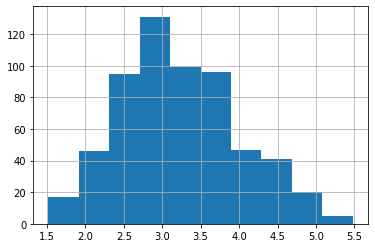

In [ ]:
create_histogram_for_one_feature(df, targetColumn)

In [ ]:
# df["image"]

In [ ]:
maxValue= max(list(df[targetColumn]))
minValue= min(list(df[targetColumn]))

print(maxValue)
print(minValue)

5.47826087
1.52


In [ ]:
columnsOfInterest=["image", "Attractive"]
interestingDF= df[columnsOfInterest]

In [ ]:
df["image"].iloc[0]

1      [[[255, 255, 255], [255, 255, 255], [255, 255,...
2      [[[255, 255, 255], [255, 255, 255], [255, 255,...
3      [[[255, 255, 255], [255, 255, 255], [255, 255,...
4      [[[255, 255, 255], [255, 255, 255], [255, 255,...
5      [[[255, 255, 255], [255, 255, 255], [255, 255,...
                             ...                        
593    [[[255, 255, 255], [255, 255, 255], [255, 255,...
594    [[[255, 255, 255], [255, 255, 255], [255, 255,...
595    [[[255, 255, 255], [255, 255, 255], [255, 255,...
596    [[[255, 255, 255], [255, 255, 255], [255, 255,...
597    [[[255, 255, 255], [255, 255, 255], [255, 255,...
Name: image, Length: 597, dtype: object

In [ ]:
from tensorflow.keras import regularizers
Heinitializer = tf.keras.initializers.HeNormal()
dropout_posibility=0.2
L2_lambda=0.0001
init_learning_rate=0.001
numberOfClasses=3

In [ ]:
# x_train_embedings[0].shape[0]
normalizer = tensorflow.keras.layers.experimental.preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(x_train_embedings))
# print(normalizer.mean.numpy())


In [ ]:
newModel = tf.keras.models.Sequential([                 
    # pre_trained_model, 
    # tf.keras.layers.GlobalAveragePooling2D(),
    # tf.keras.Input(shape=(x_train_embedings[0].shape[0],)),
    normalizer,
    tf.keras.layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(L2_lambda),kernel_initializer=Heinitializer),
    tf.keras.layers.Dropout(dropout_posibility),
    tf.keras.layers.Dense(3, activation='softmax',kernel_initializer=Heinitializer),
    ]) 


In [ ]:
numberEpochsPerIteration=15
numberOfIterations=5
for i in range(1, numberOfIterations+1):
  learning_rate=init_learning_rate/(i*10)
  adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='mean_absolute_error',
                optimizer=adamOptimizerWithCustomLearningRate)

  history= newModel.fit(
    x_train_embedings,
    y_train_hot_encoded,
    validation_data=(x_test_embedings, y_test_hot_encoded),
  # train_ds,
  # validation_data=val_ds,
  epochs=numberEpochsPerIteration
  )



In [ ]:
adamOptimizerWithCustomLearningRate =tf.keras.optimizers.Adam(learning_rate=learning_rate)
newModel.compile(
  optimizer=adamOptimizerWithCustomLearningRate,
  # loss=tf.losses.SparseCategoricalCrossentropy(),
  loss="categorical_crossentropy",
  metrics=['accuracy'])
newModel.summary()


In [ ]:
# newModel.fit(train_generator, epochs=temp_epochs, validation_data=validation_generator, 
#                         # steps_per_epoch=steps_per_epoch,validation_steps= validation_steps
#                         )
history= newModel.fit(
    x_train_embedings,
    y_train_hot_encoded,
    validation_data=(x_test_embedings, y_test_hot_encoded),
  # train_ds,
  # validation_data=val_ds,
  epochs=numberEpochs
  )

In [ ]:
plot_accuracy(history)

1. create embedgins for all pictures in dataset with their appropriate y label
done!
2. train the mlp using this embedings as input 
done!
3. create the model= faceNet+ mlp and find tune using a small learning rate. 

In [ ]:
inputshape=pre_trained_model.input.shape
newModel = tf.keras.models.Sequential([     
    layers.experimental.preprocessing.Resizing(inputshape[0] , inputshape[1]),
    pre_trained_model, 
    tf.keras.layers.GlobalAveragePooling2D(),
    classifier
]) 
newModel.build(input_shape= pre_trained_model.input.shape)

In [ ]:
#copy paste the comilation and fit of the classifier here. 